## IoT Botnet Detection

Data set contain 11 different csv files and  each file represent different type of attack data. There is two malware used on this dataset. Mirai and Gafgyt.

* benign_traffic.csv - Benign Traffic
* mirai_attacks/ack.csv - Mallicious 1
* mirai_attacks/scan.csv - mallicious 2
* mirai_attacks/syn.csv - mallicious 3
* mirai_attacks/udp.csv - mallicious 4
* mirai_attacks/udpplain.csv - mallicious 5
* gafgyt_attacks/combo.csv - mallicious 6
* gafgyt_attacks/junk.csv - mallicious 7
* gafgyt_attacks/scan.csv - mallicious 8
* gafgyt_attacks/tcp.csv - mallicious 9
* gafgyt_attacks/udp.csv - mallicious 10

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))  # add parent folder to sys.path


In [2]:
# Importing necssary modules
import pandas as pd
import numpy as np
import seaborn as sns
import os
from glob import glob
# from scripts.utils import load_device_data

# Optional: show all columns
pd.set_option('display.max_columns', None)


The data contain 9 different IoT devices, each devices having benign / mallicious traffic data. since all csv files are in seperate folder,we are creating a simple function to load the csv file into data frame

#### Loading all device data into three different dataframe

In [3]:
from scripts.utils import load_device_data

base_directory = r"C:\Users\HP\OneDrive\Documents\projects\final year projects\dataset"  # or the path to your current device
benign_df, mirai_df, gafgyt_df = load_device_data(base_directory)


#### Benign_data

In [4]:
# Checking type of the dataframe
type(benign_df)

pandas.core.frame.DataFrame

In [5]:
# Checking first few rows of the data
benign_df.head(5)

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000      354.000000            0.000000          1.000000   
2          1.857879      360.458980           35.789338          1.912127   
3          1.000000      337.000000            0.000000          1.000000   
4          1.680223      172.140917        18487.448750          1.793580   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1      354.000000            0.000000          1.000000      354.000000   
2      360.275733           35.923972          1.969807      360.091968   
3      337.000000            0.000000          1.000000      337.000000   
4      182.560279        18928.175300          1.925828      193.165753   

   MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
0            0.000000            1.000000         60.000000   
1            0.000000            1.000000        354.000000   
2           35.991542            1.996939        360.009198   
3            0.000000            1.000000        337.000000   
4        19153.795810            1.992323        197.966314   

   MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
0              0.000000             1.000000          60.000000   
1              0.000000             1.000000         354.000000   
2             35.999915             1.999693         360.000920   
3              0.000000             1.000000         337.000000   
4          19181.965180             1.999230         198.446631   

   MI_dir_L0.01_variance  H_L5_weight   H_L5_mean  H_L5_variance  H_L3_weight  \
0               0.000000     1.000000   60.000000       0.000000     1.000000   
1               0.000000     1.000000  354.000000       0.000005     1.000032   
2              35.999999     1.857879  360.458979      35.789342     1.912156   
3               0.000000     1.000000  337.000000       0.000000     1.000000   
4           19182.247150     1.680223  172.140917   18487.448750     1.793580   

    H_L3_mean  H_L3_variance  H_L1_weight   H_L1_mean  H_L1_variance  \
0   60.000000       0.000000     1.000000   60.000000       0.000000   
1  353.999619       0.004575     1.031757  353.630645       4.295839   
2  360.275456      35.928490     2.000605  359.813452      40.398803   
3  337.000000       0.000000     1.000000  337.000000       0.000000   
4  182.560279   18928.175300     1.925828  193.165753   19153.795810   

   H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
0       1.000000    60.000000         0.000000        1.000000     60.000000   
1       2.597515   346.619800        34.095047        5.319895    344.262695   
2       3.589564   352.018840       100.081513        6.318264    347.703087   
3       1.000000   337.000000         0.000000        1.000000    337.000000   
4       1.992323   197.966314     19181.965180        1.999230    198.446631   

   H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  HH_L5_magnitude  \
0          0.000000      1.000000   60.000000   0.000000        60.000000   
1         22.188299      1.000000  354.000000   0.002143       354.000000   
2         81.625077      1.857879  360.458979   5.982419       360.458979   
3          0.000000      1.000000  337.000000   0.000000       337.000000   
4      19182.247150      1.000000   60.000000   0.000000       524.399648   

   HH_L5_radius  HH_L5_covariance  HH_L5_pcc  HH_L3_weight  HH_L3_mean  \
0      0.000000               0.0        0.0      1.000000   60.000000   
1      0.000005               0.0        0.0      1.000032  353.999619   
2     35.789342               0.0        0.0      1.912156  360.275456   
3      0.000000               0.0        0.0      1.000000  337.000000   
4  31826.307570               0.0        0.0      1.000000   60.000000   

In [6]:
# Dimension of the data
benign_df.shape

(555932, 117)

In [7]:
# Information about Dataframe
benign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555932 entries, 0 to 555931
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 496.2+ MB


In [8]:
# Individual device data count
benign_df['device'].value_counts()

device
Philips_B120N10_Baby_Monitor                175240
Provision_PT_838_Security_Camera             98514
Provision_PT_737E_Security_Camera            62154
Samsung_SNH_1011_N_Webcam                    52150
Danmini_Doorbell                             49548
SimpleHome_XCS7_1002_WHT_Security_Camera     46585
Ennio_Doorbell                               39100
SimpleHome_XCS7_1003_WHT_Security_Camera     19528
Ecobee_Thermostat                            13113
Name: count, dtype: int64

In [9]:
# Checking Null values in the data
benign_df.isnull().values.any()

np.False_

In [10]:
# Columns in the dataset
list(benign_df.columns)

['MI_dir_L5_weight',
 'MI_dir_L5_mean',
 'MI_dir_L5_variance',
 'MI_dir_L3_weight',
 'MI_dir_L3_mean',
 'MI_dir_L3_variance',
 'MI_dir_L1_weight',
 'MI_dir_L1_mean',
 'MI_dir_L1_variance',
 'MI_dir_L0.1_weight',
 'MI_dir_L0.1_mean',
 'MI_dir_L0.1_variance',
 'MI_dir_L0.01_weight',
 'MI_dir_L0.01_mean',
 'MI_dir_L0.01_variance',
 'H_L5_weight',
 'H_L5_mean',
 'H_L5_variance',
 'H_L3_weight',
 'H_L3_mean',
 'H_L3_variance',
 'H_L1_weight',
 'H_L1_mean',
 'H_L1_variance',
 'H_L0.1_weight',
 'H_L0.1_mean',
 'H_L0.1_variance',
 'H_L0.01_weight',
 'H_L0.01_mean',
 'H_L0.01_variance',
 'HH_L5_weight',
 'HH_L5_mean',
 'HH_L5_std',
 'HH_L5_magnitude',
 'HH_L5_radius',
 'HH_L5_covariance',
 'HH_L5_pcc',
 'HH_L3_weight',
 'HH_L3_mean',
 'HH_L3_std',
 'HH_L3_magnitude',
 'HH_L3_radius',
 'HH_L3_covariance',
 'HH_L3_pcc',
 'HH_L1_weight',
 'HH_L1_mean',
 'HH_L1_std',
 'HH_L1_magnitude',
 'HH_L1_radius',
 'HH_L1_covariance',
 'HH_L1_pcc',
 'HH_L0.1_weight',
 'HH_L0.1_mean',
 'HH_L0.1_std',
 'HH_L0.1

Benign Data doesn't contain any null values. It contains 555932 observations,117 features.

#### Mirai Data

In [11]:
# Type of datframe
type(mirai_df)

pandas.core.frame.DataFrame

In [12]:
# Dimention of the data set
mirai_df.shape

(3668402, 117)

In [13]:
# First few rows of the data
mirai_df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000           566.0        0.000000e+00          1.000000   
1          1.996585           566.0        5.820766e-11          1.997950   
2          2.958989           566.0        0.000000e+00          2.975291   
3          3.958979           566.0        0.000000e+00          3.975285   
4          4.914189           566.0        1.164153e-10          4.948239   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0           566.0        0.000000e+00          1.000000           566.0   
1           566.0        5.820766e-11          1.999316           566.0   
2           566.0        5.820766e-11          2.991729           566.0   
3           566.0        0.000000e+00          3.991727           566.0   
4           566.0        5.820766e-11          4.982654           566.0   

   MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
0        0.000000e+00            1.000000             566.0   
1        0.000000e+00            1.999932             566.0   
2        5.820766e-11            2.999171             566.0   
3        1.164153e-10            3.999171             566.0   
4        5.820766e-11            4.998261             566.0   

   MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
0          0.000000e+00             1.000000              566.0   
1          1.746230e-10             1.999993              566.0   
2          0.000000e+00             2.999917              566.0   
3          0.000000e+00             3.999917              566.0   
4          0.000000e+00             4.999826              566.0   

   MI_dir_L0.01_variance  H_L5_weight  H_L5_mean  H_L5_variance  H_L3_weight  \
0           0.000000e+00     1.000000      566.0   0.000000e+00     1.000000   
1           1.164153e-10     1.996585      566.0   5.820766e-11     1.997950   
2           5.820766e-11     2.958989      566.0   0.000000e+00     2.975291   
3           1.164153e-10     3.958979      566.0   0.000000e+00     3.975285   
4           1.164153e-10     4.914189      566.0   1.164153e-10     4.948239   

   H_L3_mean  H_L3_variance  H_L1_weight  H_L1_mean  H_L1_variance  \
0      566.0   0.000000e+00     1.000000      566.0   0.000000e+00   
1      566.0   5.820766e-11     1.999316      566.0   0.000000e+00   
2      566.0   5.820766e-11     2.991729      566.0   5.820766e-11   
3      566.0   0.000000e+00     3.991727      566.0   1.164153e-10   
4      566.0   5.820766e-11     4.982654      566.0   5.820766e-11   

   H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
0       1.000000        566.0     0.000000e+00        1.000000         566.0   
1       1.999932        566.0     1.746230e-10        1.999993         566.0   
2       2.999171        566.0     0.000000e+00        2.999917         566.0   
3       3.999171        566.0     0.000000e+00        3.999917         566.0   
4       4.998261        566.0     0.000000e+00        4.999826         566.0   

   H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  HH_L5_magnitude  \
0      0.000000e+00      1.000000       566.0   0.000000            566.0   
1      1.164153e-10      1.996585       566.0   0.000008            566.0   
2      5.820766e-11      2.958989       566.0   0.000000            566.0   
3      1.164153e-10      3.958979       566.0   0.000000            566.0   
4      1.164153e-10      4.914189       566.0   0.000011            566.0   

   HH_L5_radius  HH_L5_covariance  HH_L5_pcc  HH_L3_weight  HH_L3_mean  \
0  0.000000e+00               0.0        0.0      1.000000       566.0   
1  5.820766e-11               0.0        0.0      1.997950       566.0   
2  0.000000e+00               0.0        0.0      2.975291       566.0   
3  0.000000e+00               0.0        0.0      3.975285       566.0   
4  1.164153e-10               0.0        0.0      4.948239       566.0   

   HH_L3_std  HH

In [14]:
# Information about dataframe
mirai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668402 entries, 0 to 3668401
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 3.2+ GB


In [15]:
# Observation count in each devices
mirai_df['device'].value_counts()

device
Danmini_Doorbell                            652100
Philips_B120N10_Baby_Monitor                610714
SimpleHome_XCS7_1003_WHT_Security_Camera    514860
SimpleHome_XCS7_1002_WHT_Security_Camera    513248
Ecobee_Thermostat                           512133
Provision_PT_737E_Security_Camera           436010
Provision_PT_838_Security_Camera            429337
Name: count, dtype: int64

Mirai attack don't have data for samsung_snh_1011_N_webcam & Ennio_doorbell

In [16]:
# Checking data contain any null value
mirai_df.isnull().values.any()

np.False_

#### gafgyt Data

In [17]:
# Type of dataframe
type(gafgyt_df)

pandas.core.frame.DataFrame

In [18]:
# First Few rows of dataframe
gafgyt_df.head(5)

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       98.000000        0.000000e+00          1.000000   
1          1.029000       98.000000        1.818989e-12          1.119520   
2          1.504156       76.725612        2.281808e+02          1.729662   
3          2.460087       75.617679        1.372200e+02          2.699075   
4          3.460055       75.150149        9.809937e+01          3.699054   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       98.000000            0.000000          1.000000       98.000000   
1       98.000000            0.000000          1.492583       98.000000   
2       79.499272          249.746357          2.294102       84.051188   
3       77.461807          164.269331          3.280499       80.987267   
4       76.525944          122.224798          4.280490       79.354915   

   MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
0        0.000000e+00            1.000000         98.000000   
1        3.637979e-12            1.931640         98.000000   
2        2.517926e+02            2.904273         86.981750   
3        1.964467e+02            3.902546         83.655268   
4        1.592943e+02            4.902545         81.685828   

   MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
0          0.000000e+00             1.000000          98.000000   
1          1.818989e-12             1.992944          98.000000   
2          2.311822e+02             2.990102          87.298025   
3          2.040614e+02             3.989925          83.965124   
4          1.775746e+02             4.989924          81.968075   

   MI_dir_L0.01_variance  H_L5_weight  H_L5_mean  H_L5_variance  H_L3_weight  \
0               0.000000     1.000000  98.000000   0.000000e+00     1.000000   
1               0.000000     1.029000  98.000000   1.818989e-12     1.119520   
2             227.930928     1.504156  76.725612   2.281808e+02     1.729662   
3             204.017078     2.460087  75.617679   1.372200e+02     2.699075   
4             179.043909     3.460055  75.150149   9.809937e+01     3.699054   

   H_L3_mean  H_L3_variance  H_L1_weight  H_L1_mean  H_L1_variance  \
0  98.000000       0.000000     1.000000  98.000000   0.000000e+00   
1  98.000000       0.000000     1.492583  98.000000   3.637979e-12   
2  79.499272     249.746357     2.294102  84.051188   2.517926e+02   
3  77.461807     164.269331     3.280499  80.987267   1.964467e+02   
4  76.525944     122.224798     4.280490  79.354915   1.592943e+02   

   H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
0       1.000000    98.000000     0.000000e+00        1.000000     98.000000   
1       1.931640    98.000000     1.818989e-12        1.992944     98.000000   
2       2.904273    86.981750     2.311822e+02        2.990102     87.298025   
3       3.902546    83.655268     2.040614e+02        3.989925     83.965124   
4       4.902545    81.685828     1.775746e+02        4.989924     81.968075   

   H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  HH_L5_magnitude  \
0          0.000000      1.000000        98.0   0.000000        98.000000   
1          0.000000      1.029000        98.0   0.000001       138.592929   
2        227.930928      1.000000        66.0   0.000000       114.856432   
3        204.017078      1.000000        74.0   0.000000        74.000000   
4        179.043909      1.999987        74.0   0.000000        74.000000   

   HH_L5_radius  HH_L5_covariance  HH_L5_pcc  HH_L3_weight  HH_L3_mean  \
0  0.000000e+00               0.0        0.0      1.000000        98.0   
1  1.818989e-12               0.0        0.0      1.119520        98.0   
2  0.000000e+00               0.0        0.0      1.000000        66.0   
3  0.000000e+00               0.0        0.0      1.000000        74.0   
4  0.000000e+00               0.0        0.0      1.999992        74.0   

   HH_L3_std  HH

In [19]:
# Information about dataframe
gafgyt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838272 entries, 0 to 2838271
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 2.5+ GB


In [20]:
# Dimention of the dataset
gafgyt_df.shape

(2838272, 117)

In [21]:
# Observation count of each device
gafgyt_df['device'].value_counts()

device
Provision_PT_737E_Security_Camera           330096
Samsung_SNH_1011_N_Webcam                   323072
Danmini_Doorbell                            316650
SimpleHome_XCS7_1003_WHT_Security_Camera    316438
Ennio_Doorbell                              316400
Philips_B120N10_Baby_Monitor                312723
Ecobee_Thermostat                           310630
Provision_PT_838_Security_Camera            309040
SimpleHome_XCS7_1002_WHT_Security_Camera    303223
Name: count, dtype: int64

In [22]:
# Checking is there any null values
gafgyt_df.isnull().values.any()

np.False_

#### Combin all data into one CSV File

In [23]:
# Combine all data into single dataframe
dfs = [benign_df, mirai_df, gafgyt_df]
df = pd.concat(dfs)

In [24]:
# Viewing first few rows of data
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000      354.000000            0.000000          1.000000   
2          1.857879      360.458980           35.789338          1.912127   
3          1.000000      337.000000            0.000000          1.000000   
4          1.680223      172.140917        18487.448750          1.793580   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1      354.000000            0.000000          1.000000      354.000000   
2      360.275733           35.923972          1.969807      360.091968   
3      337.000000            0.000000          1.000000      337.000000   
4      182.560279        18928.175300          1.925828      193.165753   

   MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
0            0.000000            1.000000         60.000000   
1            0.000000            1.000000        354.000000   
2           35.991542            1.996939        360.009198   
3            0.000000            1.000000        337.000000   
4        19153.795810            1.992323        197.966314   

   MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
0              0.000000             1.000000          60.000000   
1              0.000000             1.000000         354.000000   
2             35.999915             1.999693         360.000920   
3              0.000000             1.000000         337.000000   
4          19181.965180             1.999230         198.446631   

   MI_dir_L0.01_variance  H_L5_weight   H_L5_mean  H_L5_variance  H_L3_weight  \
0               0.000000     1.000000   60.000000       0.000000     1.000000   
1               0.000000     1.000000  354.000000       0.000005     1.000032   
2              35.999999     1.857879  360.458979      35.789342     1.912156   
3               0.000000     1.000000  337.000000       0.000000     1.000000   
4           19182.247150     1.680223  172.140917   18487.448750     1.793580   

    H_L3_mean  H_L3_variance  H_L1_weight   H_L1_mean  H_L1_variance  \
0   60.000000       0.000000     1.000000   60.000000       0.000000   
1  353.999619       0.004575     1.031757  353.630645       4.295839   
2  360.275456      35.928490     2.000605  359.813452      40.398803   
3  337.000000       0.000000     1.000000  337.000000       0.000000   
4  182.560279   18928.175300     1.925828  193.165753   19153.795810   

   H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
0       1.000000    60.000000         0.000000        1.000000     60.000000   
1       2.597515   346.619800        34.095047        5.319895    344.262695   
2       3.589564   352.018840       100.081513        6.318264    347.703087   
3       1.000000   337.000000         0.000000        1.000000    337.000000   
4       1.992323   197.966314     19181.965180        1.999230    198.446631   

   H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  HH_L5_magnitude  \
0          0.000000      1.000000   60.000000   0.000000        60.000000   
1         22.188299      1.000000  354.000000   0.002143       354.000000   
2         81.625077      1.857879  360.458979   5.982419       360.458979   
3          0.000000      1.000000  337.000000   0.000000       337.000000   
4      19182.247150      1.000000   60.000000   0.000000       524.399648   

   HH_L5_radius  HH_L5_covariance  HH_L5_pcc  HH_L3_weight  HH_L3_mean  \
0      0.000000               0.0        0.0      1.000000   60.000000   
1      0.000005               0.0        0.0      1.000032  353.999619   
2     35.789342               0.0        0.0      1.912156  360.275456   
3      0.000000               0.0        0.0      1.000000  337.000000   
4  31826.307570               0.0        0.0      1.000000   60.000000   

In [25]:
# viewing some sample data
df.sample(10)

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
159743          88.650918       60.005134            0.076986   
3625728         98.395830      347.400234        59376.821110   
776192           1.000000       60.000000            0.000000   
1835616          1.000000       60.000000            0.000000   
367024         145.622363       74.498741          100.165241   
33800          100.186860       74.059338            1.420586   
1695580         12.388306      141.567431        51702.113868   
1106520          1.000000       60.000000            0.000000   
2800720        109.489344       72.658721           16.978881   
2294529        152.191452       74.084662            2.030320   

         MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
159743         108.045032       60.017050            0.255458   
3625728        149.343318      379.139038        55804.958235   
776192           1.000000       60.000000            0.000000   
1835616          1.000000       60.000000            0.000000   
367024         253.890663       74.614850          137.931791   
33800          164.942980       74.070346            1.683484   
1695580         15.403007      128.596604        42286.662112   
1106520          1.000000       60.000000            0.000000   
2800720        201.073311       71.788761           26.067916   
2294529        257.216986       74.073156            3.064801   

         MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
159743         245.543598       60.030368            0.454693   
3625728        429.086419      393.109457        53593.260089   
776192           1.000000       60.000000            0.000000   
1835616          1.000000       60.000000            0.000000   
367024         795.910045       74.565246          195.940322   
33800          616.803303       74.060612            2.316385   
1695580         40.918237       94.700750        16632.273147   
1106520          1.000000       60.000000            0.000000   
2800720        657.347265       71.050700           32.604916   
2294529        712.037086       74.348987          244.343033   

         MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
159743          2292.582158         60.017717              0.540366   
3625728         5322.015379        409.490996          50487.592190   
776192             1.000000         60.000000              0.000000   
1835616            1.000000         60.000000              0.000000   
367024          7621.134464         74.561475            390.751393   
33800           7660.934203         74.187049             95.154522   
1695580          881.407001         75.603688            967.542423   
1106520            1.000000         60.000000              0.000000   
2800720         4442.753490         70.749422             35.163478   
2294529         6649.330615         74.609270            462.661942   

         MI_dir_L0.01_weight  MI_dir_L0.01_mean  MI_dir_L0.01_variance  \
159743          21622.938497          60.020079               0.685800   
3625728         29535.387765         400.037059           52321.968704   
776192              1.000000          60.000000               0.000000   
1835616             1.000000          60.000000               0.000000   
367024          39380.744325          74.366957             241.376673   
33800           27812.002241          74.371466             247.412106   
1695580          8618.978464          76.308943            1434.097589   
1106520             1.000000          60.000000               0.000000   
2800720          7043.202802          70.699968              35.563014   
2294529         19862.124726          74.319417             216.820917   

         H_L5_weight   H_L5_mean  H_L5_variance  H_L3_weight   H_L3_mean  \
159743     88.650918   60.005134       0.076986   108.045032   60.017050   
3625728    98.395830  347.400234   59376.821110   149.343318  379.139038   
776192      1.000000   60.000000    

In [26]:
# Dimension of the complete data set
df.shape

(7062606, 117)

So, the combined data contain 7062606 rows and 117 features. 115 features are float values which obtain from device.
two features are device and label which added when importing csv file.

The data entries are humongous which mkes the EDA process slow ...To make things easier a sample of 500 entries is taken to do the EDA and other analysis

In [27]:
# Stratified sampling example
sample_data = df.groupby(['device','label']).sample(n=50, random_state=42, replace=True)


In [28]:
sample_data.shape

(1250, 117)

In [ ]:
# Save the sample data to a CSV file
output_path = r"C:\Users\HP\OneDrive\Documents\projects\final year projects\dataset\merged dataset.csv"
df.to_csv(output_path, index=False)

print(f"merged dataset saved successfully at: {output_path}")


In [30]:
# Save the sample data to a CSV file
output_path = r"C:\Users\HP\OneDrive\Documents\projects\final year projects\dataset\sample_eda_data.csv"
sample_data.to_csv(output_path, index=False)

print(f"Sample data saved successfully at: {output_path}")


Sample data saved successfully at: C:\Users\HP\OneDrive\Documents\projects\final year projects\dataset\sample_eda_data.csv


In [31]:
# Create list to store all device name for easy access
device_list = ['Danmini_Doorbell', 'Ecobee_Thermostat', 
                        'Ennio_Doorbell', 'Philips_B120N10_Baby_Monitor',
                        'Provision_PT_737E_Security_Camera', 'Provision_PT_838_Security_Camera',
                        'Samsung_SNH_1011_N_Webcam', 'SimpleHome_XCS7_1002_WHT_Security_Camera',
                        'SimpleHome_XCS7_1003_WHT_Security_Camera']

The data loaded into differernt dataframes based on the device. each dataframe labeles are classified into 3 categories called benign, mirai, gafgyt

In [32]:
file_extension='.csv'

#### Danmini DoorBell

In [33]:
# Loading All device csv file into single dataframe using custom funcrion
danmini_doorbell_df = df[df['device'] == "Danmini_Doorbell"]
# ecobee_thermostat_df = df[sample_data['device']=="Ecobee_Thermostat"]
# ennio_doorbell_df = df[sample_data['device']=="Ennio_Doorbell"]
# philips_baby_monitor_df = df[sample_data['device']=="Philips_B120N10_Baby_Monitor"]
# provision_pt_737e_security_camera_df = df[sample_data['device']=="Provision_PT_737E_Security_Camera"]
# provision_pt_838_security_camera_df = df[sample_data['device']=="Provision_PT_838_Security_Camera"]
# samsung_snh_1011_n_webcam_df = df[sample_data['device']=="Samsung_SNH_1011_N_Webcam"]
# simplehome_xcs7_1002_wht_security_camera_df = df[sample_data['device']=="SimpleHome_XCS7_1002_WHT_Security_Camera"]
# simplehome_xcs7_1003_wht_security_camera_df = df[sample_data['device']=="SimpleHome_XCS7_1003_WHT_Security_Camera"]

In [34]:
# Viewing first few rows of the data
danmini_doorbell_df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000            0.000000          1.000000   
1          1.000000      354.000000            0.000000          1.000000   
2          1.857879      360.458980           35.789338          1.912127   
3          1.000000      337.000000            0.000000          1.000000   
4          1.680223      172.140917        18487.448750          1.793580   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1      354.000000            0.000000          1.000000      354.000000   
2      360.275733           35.923972          1.969807      360.091968   
3      337.000000            0.000000          1.000000      337.000000   
4      182.560279        18928.175300          1.925828      193.165753   

   MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
0            0.000000            1.000000         60.000000   
1            0.000000            1.000000        354.000000   
2           35.991542            1.996939        360.009198   
3            0.000000            1.000000        337.000000   
4        19153.795810            1.992323        197.966314   

   MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
0              0.000000             1.000000          60.000000   
1              0.000000             1.000000         354.000000   
2             35.999915             1.999693         360.000920   
3              0.000000             1.000000         337.000000   
4          19181.965180             1.999230         198.446631   

   MI_dir_L0.01_variance  H_L5_weight   H_L5_mean  H_L5_variance  H_L3_weight  \
0               0.000000     1.000000   60.000000       0.000000     1.000000   
1               0.000000     1.000000  354.000000       0.000005     1.000032   
2              35.999999     1.857879  360.458979      35.789342     1.912156   
3               0.000000     1.000000  337.000000       0.000000     1.000000   
4           19182.247150     1.680223  172.140917   18487.448750     1.793580   

    H_L3_mean  H_L3_variance  H_L1_weight   H_L1_mean  H_L1_variance  \
0   60.000000       0.000000     1.000000   60.000000       0.000000   
1  353.999619       0.004575     1.031757  353.630645       4.295839   
2  360.275456      35.928490     2.000605  359.813452      40.398803   
3  337.000000       0.000000     1.000000  337.000000       0.000000   
4  182.560279   18928.175300     1.925828  193.165753   19153.795810   

   H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
0       1.000000    60.000000         0.000000        1.000000     60.000000   
1       2.597515   346.619800        34.095047        5.319895    344.262695   
2       3.589564   352.018840       100.081513        6.318264    347.703087   
3       1.000000   337.000000         0.000000        1.000000    337.000000   
4       1.992323   197.966314     19181.965180        1.999230    198.446631   

   H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  HH_L5_magnitude  \
0          0.000000      1.000000   60.000000   0.000000        60.000000   
1         22.188299      1.000000  354.000000   0.002143       354.000000   
2         81.625077      1.857879  360.458979   5.982419       360.458979   
3          0.000000      1.000000  337.000000   0.000000       337.000000   
4      19182.247150      1.000000   60.000000   0.000000       524.399648   

   HH_L5_radius  HH_L5_covariance  HH_L5_pcc  HH_L3_weight  HH_L3_mean  \
0      0.000000               0.0        0.0      1.000000   60.000000   
1      0.000005               0.0        0.0      1.000032  353.999619   
2     35.789342               0.0        0.0      1.912156  360.275456   
3      0.000000               0.0        0.0      1.000000  337.000000   
4  31826.307570               0.0        0.0      1.000000   60.000000   

In [35]:
# Dimention of the data
danmini_doorbell_df.shape

(1018298, 117)

In [36]:
# Information about the dataframe
danmini_doorbell_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018298 entries, 0 to 316649
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 916.7+ MB


In [37]:
# Showing details stats about the dataset
danmini_doorbell_df.describe()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count      1.018298e+06    1.018298e+06        1.018298e+06      1.018298e+06   
mean       9.479704e+01    1.927187e+02        1.970133e+04      1.502972e+02   
std        6.380090e+01    1.631548e+02        2.517558e+04      1.010881e+02   
min        1.000000e+00    6.000000e+01        0.000000e+00      1.000000e+00   
25%        1.124271e+01    6.000000e+01        3.755417e-09      2.661462e+01   
50%        1.108011e+02    7.407356e+01        3.869695e+01      1.870080e+02   
75%        1.471055e+02    3.308499e+02        4.867314e+04      2.311400e+02   
max        3.416813e+02    8.861669e+02        1.738886e+05      4.704900e+02   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count    1.018298e+06        1.018298e+06      1.018298e+06    1.018298e+06   
mean     1.934838e+02        2.200175e+04      4.328257e+02    1.947330e+02   
std      1.565037e+02        2.676519e+04      2.933892e+02    1.525693e+02   
min      6.000000e+01        0.000000e+00      1.000000e+00    6.000000e+01   
25%      6.000010e+01        3.010483e-05      8.697365e+01    6.000718e+01   
50%      7.408601e+01        4.342837e+01      5.983945e+02    7.423949e+01   
75%      3.470927e+02        5.360581e+04      6.589923e+02    3.664007e+02   
max      8.463203e+02        1.731848e+05      9.793564e+02    7.097253e+02   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
count        1.018298e+06        1.018298e+06      1.018298e+06   
mean         2.348970e+04        4.118614e+03      1.954308e+02   
std          2.788289e+04        2.805190e+03      1.525100e+02   
min          0.000000e+00        1.000000e+00      6.000000e+01   
25%          5.714647e-02        7.962799e+02      6.001875e+01   
50%          4.581586e+01        5.783836e+03      7.482502e+01   
75%          5.600682e+04        6.406809e+03      3.817763e+02   
max          1.730770e+05        7.964172e+03      5.660000e+02   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
count          1.018298e+06         1.018298e+06       1.018298e+06   
mean           2.364051e+04         2.631387e+04       1.953742e+02   
std            2.795824e+04         2.120717e+04       1.526030e+02   
min            0.000000e+00         1.000000e+00       6.000000e+01   
25%            6.102558e-01         2.849159e+03       6.002032e+01   
50%            2.058160e+02         2.262677e+04       7.455869e+01   
75%            5.549322e+04         4.524643e+04       3.828397e+02   
max            1.376493e+05         6.278168e+04       5.660000e+02   

       MI_dir_L0.01_variance   H_L5_weight     H_L5_mean  H_L5_variance  \
count           1.018298e+06  1.018298e+06  1.018298e+06   1.018298e+06   
mean            2.363428e+04  9.479704e+01  1.927187e+02   1.970133e+04   
std             2.795543e+04  6.380090e+01  1.631548e+02   2.517558e+04   
min             0.000000e+00  1.000000e+00  6.000000e+01   0.000000e+00   
25%             6.993637e-01  1.124271e+01  6.000000e+01   3.769551e-09   
50%             2.708815e+02  1.108011e+02  7.407356e+01   3.869695e+01   
75%             5.527149e+04  1.471055e+02  3.308499e+02   4.867314e+04   
max             1.207384e+05  3.416813e+02  8.861669e+02   1.738886e+05   

        H_L3_weight     H_L3_mean  H_L3_variance   H_L1_weight     H_L1_mean  \
count  1.018298e+06  1.018298e+06   1.018298e+06  1.018298e+06  1.018298e+06   
mean   1.502972e+02  1.934838e+02   2.200175e+04  4.328257e+02  1.947330e+02   
std    1.010881e+02  1.565037e+02   2.676519e+04  2.933892e+02  1.525693e+02   
min    1.000000e+00  6.000000e+01   0.000000e+00  1.000000e+00  6.000000e+01   
25%    2.661462e+01  6.000010e+01   3.016980e-05  8.697365e+01  6.000718e+01   
50%    1.870080e+02  7.408601e+01   4.342837e+01  5.983945e+02  7.423949e+01   
75%    2.311400e+02  3.470927e+02   5.360581e+04  6.589923e+02  3.664007e+02   
max  

#### Ecobee_Thermostat

In [38]:
# Loading All device csv file into single dataframe using custom funcrion
ecobee_thermostat_df = df[df['device']=="Ecobee_Thermostat"]

In [39]:
# Viewing first few rows of the dataset
ecobee_thermostat_df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
49548          1.000000       60.000000            0.000000          1.000000   
49549          1.000000      110.000000            0.000000          1.000000   
49550          1.724055       91.439104          249.441812          1.823878   
49551          1.000000      342.000000            0.000000          1.000000   
49552          2.516815       90.867308          150.827639          2.688981   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
49548       60.000000            0.000000          1.000000       60.000000   
49549      110.000000            0.000000          1.000000      110.000000   
49550       92.454965          253.612868          1.937463       93.483558   
49551      342.000000            0.000000          1.000000      342.000000   
49552       91.541993          160.705060          2.888469       92.277536   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
49548            0.000000            1.000000         60.000000   
49549            0.000000            1.000000        110.000000   
49550          255.733288            1.993563         93.948338   
49551            0.000000            1.000000        342.000000   
49552          169.944112            2.988463         92.627145   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
49548              0.000000             1.000000          60.000000   
49549              0.000000             1.000000         110.000000   
49550            255.997331             1.999354          93.994834   
49551              0.000000             1.000000         342.000000   
49552            173.806439             2.998842          92.662708   

       MI_dir_L0.01_variance  H_L5_weight   H_L5_mean  H_L5_variance  \
49548               0.000000     1.000000   60.000000       0.000000   
49549               0.000000     1.000000  110.000000       0.000000   
49550             255.999973     1.724055   91.439104     249.441812   
49551               0.000000     1.000000  342.000000       0.000000   
49552             174.180770     2.516815   90.867308     150.827639   

       H_L3_weight   H_L3_mean  H_L3_variance  H_L1_weight   H_L1_mean  \
49548     1.000000   60.000000       0.000000     1.000000   60.000000   
49549     1.000000  110.000000       0.000000     1.000000  110.000000   
49550     1.823878   92.454965     253.612868     1.937463   93.483558   
49551     1.000000  342.000000       0.000000     1.000000  342.000000   
49552     2.688981   91.541993     160.705060     2.888469   92.277536   

       H_L1_variance  H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  \
49548       0.000000       1.000000    60.000000     0.000000e+00   
49549       0.000000       1.000000   110.000000     2.310000e-07   
49550     255.733288       1.993563    93.948338     2.559973e+02   
49551       0.000000       1.000000   342.000000     2.740000e-07   
49552     169.944112       2.988463    92.627145     1.738064e+02   

       H_L0.01_weight  H_L0.01_mean  H_L0.01_variance  HH_L5_weight  \
49548        1.000000     60.000000          0.000000       1.00000   
49549        1.357860    103.675426        120.207546       1.00000   
49550        2.356983     92.782084        230.233248       1.00000   
49551        2.487473    341.959189         53.991908       1.00000   
49552        3.356380     91.953189        163.256525       1.63702   

       HH_L5_mean  HH_L5_std  HH_L5_magnitude  HH_L5_radius  HH_L5_covariance  \
49548   60.000000   0.000000        60.000000      0.000000               0.0   
49549  110.000000   0.000000       110.000000      0.000000               0.0   
49550   78.000000   0.000000        78.000000      0.000000               0.0   
49551  342.000000   0.000000       342.000000      0.000000               0.0   
49552   97.782678   9.751076        97.782678     95.083484               0.0   

       H

In [40]:
# information about the dataset
ecobee_thermostat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835876 entries, 49548 to 627279
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 752.5+ MB


In [41]:
# Dimentions of the dataframe
ecobee_thermostat_df.shape

(835876, 117)

In [42]:
# Showing detail stats about the dataframe
ecobee_thermostat_df.describe()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count     835876.000000   835876.000000        8.358760e+05     835876.000000   
mean          98.003402      220.472899        1.688949e+04        156.933719   
std           68.847613      187.861701        2.346392e+04        109.040422   
min            1.000000       60.000000        0.000000e+00          1.000000   
25%            1.199515       60.000000        9.094947e-13          1.400636   
50%          113.808087       74.044616        3.947754e+01        190.624152   
75%          152.350429      405.213898        3.595471e+04        242.986523   
max          438.002839     1108.154953        2.721017e+05        505.805302   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count   835876.000000        8.358760e+05     835876.000000   835876.000000   
mean       220.131366        1.864839e+04        450.859739      219.641089   
std        182.895330        2.357280e+04        309.944529      177.919118   
min         60.000000        0.000000e+00          1.000000       60.000000   
25%         60.000000        1.818989e-12          1.778399       60.000003   
50%         74.060133        4.051358e+01        587.912980       74.117818   
75%        410.900591        4.145993e+04        679.779763      419.401128   
max       1090.333261        2.693159e+05       1185.249664      940.451256   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
count        8.358760e+05       835876.000000     835876.000000   
mean         2.031539e+04         4201.866987        219.463849   
std          2.379110e+04         2879.160682        176.100978   
min          0.000000e+00            1.000000         60.000000   
25%          6.173169e-07            3.026374         60.006249   
50%          4.074233e+01         5768.226428         74.537109   
75%          4.620504e+04         6453.703423        425.441301   
max          2.416279e+05         8912.649148        745.331388   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
count         835876.000000        835876.000000      835876.000000   
mean           20900.820223         23498.586937         218.603184   
std            23946.498199         19700.145296         175.623473   
min                0.000000             1.000000          60.000000   
25%                0.063634            13.684798          60.105859   
50%              298.132500         22016.455278          74.412737   
75%            47460.332836         41565.888090         426.722494   
max           195348.536300         59759.857848         566.000000   

       MI_dir_L0.01_variance    H_L5_weight      H_L5_mean  H_L5_variance  \
count          835876.000000  835876.000000  835876.000000   8.358760e+05   
mean            21031.467028      98.003402     220.472899   1.688949e+04   
std             23958.858635      68.847613     187.861701   2.346392e+04   
min                 0.000000       1.000000      60.000000   0.000000e+00   
25%                 1.834474       1.199515      60.000000   9.094947e-13   
50%               272.962289     113.808087      74.044616   3.947754e+01   
75%             47145.386592     152.350429     405.213898   3.595471e+04   
max            120738.382855     438.002839    1108.154953   2.721017e+05   

         H_L3_weight      H_L3_mean  H_L3_variance    H_L1_weight  \
count  835876.000000  835876.000000   8.358760e+05  835876.000000   
mean      156.933719     220.131366   1.864839e+04     450.859739   
std       109.040422     182.895330   2.357280e+04     309.944529   
min         1.000000      60.000000   0.000000e+00       1.000000   
25%         1.400636      60.000000   1.818989e-12       1.778399   
50%       190.624152      74.060133   4.051358e+01     587.912980   
75%       242.986523     410.900591   4.145993e+04     679.779763   
max       505.805302    1090.333261   2.693159e+05    1185.249664   

     

#### Ennio_Doorbell

In [43]:
# Loading All device csv file into single dataframe using custom funcrion
ennio_doorbell_df = df[df['device'] == "Ennio_Doorbell"]

In [44]:
# Viewing first few rows of the dataset
ennio_doorbell_df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
62661          1.000000       60.000000             0.00000          1.000000   
62662          1.000000       70.000000             0.00000          1.000000   
62663          1.000023       89.999548             0.00904          1.001631   
62664          1.000000       60.000000             0.00000          1.000000   
62665          1.000000      590.000000             0.00000          1.000000   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
62661       60.000000        0.000000e+00          1.000000       60.000000   
62662       70.000000        0.000000e+00          1.000000       70.000000   
62663       89.967432        6.503024e-01          1.117713       87.893685   
62664       60.000000        4.550000e-13          1.000091       60.000000   
62665      590.000000        0.000000e+00          1.000000      590.000000   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
62661        0.000000e+00            1.000000         60.000000   
62662        0.000000e+00            1.000000         70.000000   
62663        3.768974e+01            1.807388         81.065692   
62664        4.550000e-13            1.394277         60.000000   
62665        0.000000e+00            1.000000        590.000000   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
62661          0.000000e+00             1.000000          60.000000   
62662          0.000000e+00             1.000000          70.000000   
62663          9.886430e+01             1.978832          80.106971   
62664          9.090000e-13             1.911130          60.000000   
62665          0.000000e+00             1.000000         590.000000   

       MI_dir_L0.01_variance  H_L5_weight   H_L5_mean  H_L5_variance  \
62661           0.000000e+00     1.000000   60.000000        0.00000   
62662           0.000000e+00     1.000000   70.000000        0.00000   
62663           9.998856e+01     1.000023   89.999548        0.00904   
62664           9.090000e-13     1.000000   60.000000        0.00000   
62665           0.000000e+00     1.000000  590.000000        0.00000   

       H_L3_weight   H_L3_mean  H_L3_variance  H_L1_weight   H_L1_mean  \
62661     1.000000   60.000000   0.000000e+00     1.000000   60.000000   
62662     1.000000   70.000000   0.000000e+00     1.000000   70.000000   
62663     1.001631   89.967432   6.503024e-01     1.117713   87.893685   
62664     1.000000   60.000000   4.550000e-13     1.000091   60.000000   
62665     1.000000  590.000000   0.000000e+00     1.000000  590.000000   

       H_L1_variance  H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  \
62661   0.000000e+00       1.000000    60.000000     0.000000e+00   
62662   0.000000e+00       1.000000    70.000000     0.000000e+00   
62663   3.768974e+01       1.807388    81.065692     9.886430e+01   
62664   4.550000e-13       1.394277    60.000000     9.090000e-13   
62665   0.000000e+00       1.000889   589.779701     5.458555e+01   

       H_L0.01_weight  H_L0.01_mean  H_L0.01_variance  HH_L5_weight  \
62661        1.000000     60.000000      0.000000e+00           1.0   
62662        1.000000     70.000000      0.000000e+00           1.0   
62663        1.978832     80.106971      9.998856e+01           1.0   
62664        1.911130     60.000000      9.090000e-13           1.0   
62665        4.274029    399.892026      1.104145e+04           1.0   

       HH_L5_mean  HH_L5_std  HH_L5_magnitude  HH_L5_radius  HH_L5_covariance  \
62661        60.0        0.0             60.0           0.0               0.0   
62662        70.0        0.0             70.0           0.0               0.0   
62663        90.0        0.0             90.0           0.0               0.0   
62664        60.0        0.0             60.0           0.0               0.0   
62665       590.0        0.0            590.0           0.0               0.0   

       H

In [45]:
# Dimention of the dataset
ennio_doorbell_df.shape

(355500, 117)

In [46]:
# Information about the dataset
ennio_doorbell_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355500 entries, 62661 to 943679
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 320.0+ MB


In [47]:
# showing stat information about data set
ennio_doorbell_df.describe()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count     355500.000000   355500.000000       355500.000000     355500.000000   
mean          42.917391       67.268125          266.961430         68.903479   
std           69.576572       15.958070         3048.519143        113.498429   
min            1.000000       60.000000            0.000000          1.000000   
25%            1.000000       60.000000            0.000000          1.000000   
50%            1.000000       60.000000            0.000000          1.000000   
75%           71.470343       74.033009            0.527706        100.138669   
max          304.382099      886.166851       173888.566142        407.906734   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count   355500.000000       355500.000000     355500.000000   355500.000000   
mean        67.155625          292.858935        194.918780       67.112638   
std         14.056560         3073.339772        330.837382       12.154093   
min         60.000000            0.000000          1.000000       60.000000   
25%         60.000000            0.000000          1.000000       60.000000   
50%         60.000000            0.000000          1.000000       60.000000   
75%         74.048391            1.042741        211.996467       74.068483   
max        846.320306       173184.843316        965.200154      709.725273   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
count       355500.000000       355500.000000     355500.000000   
mean           321.020962         1618.672220         67.564452   
std           2731.241085         2836.533368         10.927244   
min              0.000000            1.000000         60.000000   
25%              0.000000            1.000000         60.000000   
50%              0.000000            1.000000         60.000000   
75%              3.756670         1102.904175         74.465867   
max         173077.043447         7964.172032        590.000000   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
count         355500.000000        355500.000000      355500.000000   
mean             398.703275          5371.632499          67.682451   
std             2158.907733         10006.995733          10.637192   
min                0.000000             1.000000          60.000000   
25%                0.000000             1.000000          60.000000   
50%                0.000000             1.000000          60.000000   
75%              122.459445          7394.124359          74.438802   
max           137649.293909         40128.063344         590.000000   

       MI_dir_L0.01_variance    H_L5_weight      H_L5_mean  H_L5_variance  \
count          355500.000000  355500.000000  355500.000000  355500.000000   
mean              454.595303      42.917391      67.268125     266.961430   
std              2015.320112      69.576572      15.958070    3048.519143   
min                 0.000000       1.000000      60.000000       0.000000   
25%                 0.000000       1.000000      60.000000       0.000000   
50%                 0.000000       1.000000      60.000000       0.000000   
75%               209.682307      71.470343      74.033009       0.527706   
max            120738.382855     304.382099     886.166851  173888.566142   

         H_L3_weight      H_L3_mean  H_L3_variance    H_L1_weight  \
count  355500.000000  355500.000000  355500.000000  355500.000000   
mean       68.903479      67.155625     292.858935     194.918780   
std       113.498429      14.056560    3073.339772     330.837382   
min         1.000000      60.000000       0.000000       1.000000   
25%         1.000000      60.000000       0.000000       1.000000   
50%         1.000000      60.000000       0.000000       1.000000   
75%       100.138669      74.048391       1.042741     211.996467   
max       407.906734     846.320306  173184.843316     965.200154   

     

#### Philips_B120N10_Baby_Monitor

In [48]:
# Loading All device csv file into single dataframe using custom funcrion
baby_monitor_df = df[df['device']=="Philips_B120N10_Baby_Monitor"]

In [49]:
# Viewing first few rows of the dataset
baby_monitor_df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
101761          1.000000            60.0        0.000000e+00   
101762          1.000000            60.0        0.000000e+00   
101763          1.000000           342.0        0.000000e+00   
101764          1.963325           342.0        4.370000e-11   
101765          1.000000            60.0        0.000000e+00   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
101761          1.000000            60.0                 0.0   
101762          1.000000            60.0                 0.0   
101763          1.000000           342.0                 0.0   
101764          1.977831           342.0                 0.0   
101765          1.000000            60.0                 0.0   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
101761          1.000000            60.0                 0.0   
101762          1.000000            60.0                 0.0   
101763          1.000000           342.0                 0.0   
101764          1.992555           342.0                 0.0   
101765          1.000000            60.0                 0.0   

        MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
101761            1.000000              60.0          0.000000e+00   
101762            1.000000              60.0          0.000000e+00   
101763            1.000000             342.0          0.000000e+00   
101764            1.999253             342.0          1.460000e-11   
101765            1.000000              60.0          0.000000e+00   

        MI_dir_L0.01_weight  MI_dir_L0.01_mean  MI_dir_L0.01_variance  \
101761             1.000000               60.0           0.000000e+00   
101762             1.000000               60.0           0.000000e+00   
101763             1.000000              342.0           0.000000e+00   
101764             1.999925              342.0           1.460000e-11   
101765             1.000000               60.0           0.000000e+00   

        H_L5_weight   H_L5_mean  H_L5_variance  H_L3_weight   H_L3_mean  \
101761     1.000000   60.000000       0.000000     1.000000   60.000000   
101762     1.000000   60.000000       0.000000     1.000000   60.000000   
101763     1.000000  342.000002       0.000477     1.000018  342.004453   
101764     1.963325  342.000001       0.000234     1.977848  342.002201   
101765     1.000000   60.000000       0.000000     1.000000   60.000000   

        H_L3_variance  H_L1_weight   H_L1_mean  H_L1_variance  H_L0.1_weight  \
101761       0.000000     1.000000   60.000000       0.000000       1.000000   
101762       0.000000     1.000000   60.000000       0.000000       1.000000   
101763       1.104256     1.041566  351.897004    2356.506354       2.357786   
101764       0.545949     2.033812  347.030770    1222.322242       3.356025   
101765       0.000000     1.000000   60.000000       0.000000       1.000000   

        H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
101761    60.000000          0.00000        1.000000     60.000000   
101762    60.000000          0.00000        1.000000     60.000000   
101763   484.806922      15022.29970        6.249414    449.603272   
101764   442.254519      14812.15211        7.248947    434.759286   
101765    60.000000          0.00000        1.000000     60.000000   

        H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  \
101761           0.00000      1.000000   60.000000   0.000000   
101762           0.00000      1.000000   60.000000   0.000000   
101763       15107.14730      1.000000  342.000002   0.021841   
101764       14400.01777      1.963325  342.000001   0.015299   
101765           0.00000      1.000000   60.000000   0.000000   

        HH_L5_magnitude  HH_L5_radius  HH_L5_covariance  HH_L5_pcc  \
101761        60.000000      0.000000               0.0        0.0   
101762        60.000000      0.000000               0.0        0.0   
101763       342.000002      0.000477  

In [50]:
# Dimention of the dataframe
baby_monitor_df.shape

(1098677, 117)

In [51]:
# information about the dataframe 
baby_monitor_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098677 entries, 101761 to 1256402
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 989.1+ MB


In [52]:
# Viewing stats information about the datafame
baby_monitor_df.describe()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count      1.098677e+06    1.098677e+06        1.098677e+06      1.098677e+06   
mean       8.282547e+01    1.760965e+02        1.744759e+04      1.311469e+02   
std        6.727041e+01    1.621744e+02        2.793956e+04      1.067120e+02   
min        1.000000e+00    6.000000e+01        0.000000e+00      1.000000e+00   
25%        1.082647e+00    6.000018e+01        1.000000e-11      1.268566e+00   
50%        1.020337e+02    7.309616e+01        1.501728e+01      1.703478e+02   
75%        1.415139e+02    2.942596e+02        4.161710e+04      2.239025e+02   
max        3.416813e+02    1.452697e+03        4.756482e+05      4.704900e+02   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count    1.098677e+06        1.098677e+06      1.098677e+06    1.098677e+06   
mean     1.766500e+02        1.944151e+04      3.774167e+02    1.774775e+02   
std      1.560725e+02        2.941656e+04      3.098409e+02    1.520849e+02   
min      6.000000e+01        0.000000e+00      1.000000e+00    6.000000e+01   
25%      6.000293e+01        2.525091e-06      2.010599e+00    6.002243e+01   
50%      7.276055e+01        3.036599e+01      5.057184e+02    7.392377e+01   
75%      3.235337e+02        4.915055e+04      6.513534e+02    3.578301e+02   
max      1.450730e+03        4.714568e+05      9.793564e+02    1.434056e+03   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
count        1.098677e+06        1.098677e+06      1.098677e+06   
mean         2.076965e+04        3.620586e+03      1.780721e+02   
std          3.024090e+04        2.970856e+03      1.514854e+02   
min          0.000000e+00        1.000000e+00      6.000000e+01   
25%          8.673721e-02        1.034542e+01      6.002295e+01   
50%          4.423586e+01        5.001760e+03      7.395095e+01   
75%          5.454683e+04        6.394434e+03      3.801272e+02   
max          4.713175e+05        7.964172e+03      1.401994e+03   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
count          1.098677e+06         1.098677e+06       1.098677e+06   
mean           2.136402e+04         2.329198e+04       1.785689e+02   
std            3.089400e+04         2.158636e+04       1.516444e+02   
min            0.000000e+00         1.000000e+00       6.000000e+01   
25%            8.709712e-01         9.954776e+01       6.002098e+01   
50%            3.007165e+02         2.130290e+04       7.267663e+01   
75%            5.529843e+04         4.159422e+04       3.823318e+02   
max            4.520011e+05         6.268426e+04       1.383836e+03   

       MI_dir_L0.01_variance   H_L5_weight     H_L5_mean  H_L5_variance  \
count           1.098677e+06  1.098677e+06  1.098677e+06   1.098677e+06   
mean            2.191140e+04  8.282547e+01  1.760965e+02   1.744760e+04   
std             3.019330e+04  6.727041e+01  1.621744e+02   2.793956e+04   
min             0.000000e+00  1.000000e+00  6.000000e+01   0.000000e+00   
25%             7.291403e-01  1.082651e+00  6.000018e+01   1.000000e-11   
50%             3.679405e+02  1.020337e+02  7.309616e+01   1.501796e+01   
75%             5.523401e+04  1.415139e+02  2.942596e+02   4.161710e+04   
max             4.541036e+05  3.416813e+02  1.452697e+03   4.756482e+05   

        H_L3_weight     H_L3_mean  H_L3_variance   H_L1_weight     H_L1_mean  \
count  1.098677e+06  1.098677e+06   1.098677e+06  1.098677e+06  1.098677e+06   
mean   1.311469e+02  1.766500e+02   1.944152e+04  3.774167e+02  1.774776e+02   
std    1.067120e+02  1.560725e+02   2.941655e+04  3.098408e+02  1.520851e+02   
min    1.000000e+00  6.000000e+01   0.000000e+00  1.000000e+00  6.000000e+01   
25%    1.268576e+00  6.000293e+01   2.527831e-06  2.010627e+00  6.002243e+01   
50%    1.703478e+02  7.276055e+01   3.036655e+01  5.057184e+02  7.392377e+01   
75%    2.239025e+02  3.235337e+02   4.915055e+04  6.513534e+02  3.578306e+02   
max  

#### Provision_PT_737E_Security_Camera

In [53]:
# Loading All device csv file into single dataframe using custom funcrion
provision_cam1_df = df[df['device']=="Provision_PT_737E_Security_Camera"]   

In [54]:
# Viewing first few rows of the data
provision_cam1_df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
277001          1.000000       60.000000            0.000000   
277002          1.000000      590.000000            0.000000   
277003          1.942585      590.000000            0.000000   
277004          1.000000       60.000000            0.000000   
277005          1.979600       66.061831           35.996177   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
277001          1.000000         60.0000        0.000000e+00   
277002          1.000000        590.0000        0.000000e+00   
277003          1.965145        590.0000        1.160000e-10   
277004          1.000000         60.0000        0.000000e+00   
277005          1.987709         66.0371        3.599862e+01   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
277001          1.000000       60.000000            0.000000   
277002          1.000000      590.000000            0.000000   
277003          1.988244      590.000000            0.000000   
277004          1.000000       60.000000            0.000000   
277005          1.995886       66.012367           35.999847   

        MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
277001            1.000000         60.000000              0.000000   
277002            1.000000        590.000000              0.000000   
277003            1.998818        590.000000              0.000000   
277004            1.000000         60.000000              0.000000   
277005            1.999588         66.001237             35.999998   

        MI_dir_L0.01_weight  MI_dir_L0.01_mean  MI_dir_L0.01_variance  \
277001             1.000000          60.000000           0.000000e+00   
277002             1.000000         590.000000           0.000000e+00   
277003             1.999882         590.000000           1.160000e-10   
277004             1.000000          60.000000           0.000000e+00   
277005             1.999959          66.000124           3.600000e+01   

        H_L5_weight   H_L5_mean  H_L5_variance  H_L3_weight  H_L3_mean  \
277001     1.000000   60.000000       0.000000     1.000000    60.0000   
277002     1.000000  590.000000       0.000000     1.000000   590.0000   
277003     1.942585  590.000000       0.000000     1.965145   590.0000   
277004     1.000000   60.000000       0.000000     1.000000    60.0000   
277005     1.979600   66.061831      35.996177     1.987709    66.0371   

        H_L3_variance  H_L1_weight   H_L1_mean  H_L1_variance  H_L0.1_weight  \
277001   0.000000e+00     1.000000   60.000000       0.000000       1.000000   
277002   6.980000e-10     1.000023  589.994396       1.389841       1.626503   
277003   3.490000e-10     1.988266  589.997214       0.690827       2.624581   
277004   0.000000e+00     1.000000   60.000000       0.000000       1.000000   
277005   3.599862e+01     1.995886   66.012367      35.999847       1.999588   

        H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
277001    60.000000         0.000000        1.000000     60.000000   
277002   494.560774     14560.282180        6.302352    416.121686   
277003   530.924382     11160.824630        7.301607    439.935392   
277004    60.000000         0.000000        1.000000     60.000000   
277005    66.001237        35.999998        1.999959     66.000124   

        H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  \
277001           0.00000      1.000000   60.000000   0.000000   
277002       12888.15384      1.000000  590.000000   0.000000   
277003       14696.63622      1.942585  590.000000   0.000000   
277004           0.00000      1.000000   60.000000   0.000000   
277005          36.00000      1.979600   66.061831   5.999681   

        HH_L5_magnitude  HH_L5_radius  HH_L5_covariance  HH_L5_pcc  \
277001        60.000000       0.00000          0.000000   0.000000   
277002       590.000000       0.00000          0.000000   0.000000   
277003       590.000000       0.00000        

In [55]:
# Dimention of the dataframe
provision_cam1_df.shape

(828260, 117)

In [56]:
# Information about the dataframe
provision_cam1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 828260 entries, 277001 to 1586498
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 745.7+ MB


In [57]:
# Statistical information about dataframe
provision_cam1_df.describe()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count     828260.000000   828260.000000       828260.000000     828260.000000   
mean          67.311679      154.571968        16721.765263        103.003649   
std           61.644950      140.697750        24611.124407         95.028445   
min            1.000000       60.000000            0.000000          1.000000   
25%            1.000000       60.000000            0.000000          1.000000   
50%           60.962622       74.006076            2.596261         95.806756   
75%          109.076405      234.606146        44657.446837        159.868286   
max          379.917235      886.166851       410576.913200        558.677007   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count   828260.000000       828260.000000     828260.000000   828260.000000   
mean       154.717533        18538.776636        277.934433      155.128548   
std        134.218858        26255.495273        256.094264      128.004176   
min         60.000000            0.000000          1.000000       60.000000   
25%         60.000000            0.000000          1.000000       60.000000   
50%         74.015634            3.977276        261.573391       74.034819   
75%        265.366024        52088.312604        413.999858      306.918157   
max        846.320306       302101.970400       1010.048007      709.725273   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
count       828260.000000       828260.000000     828260.000000   
mean         20275.652743         2450.751309        155.405630   
std          27989.989272         2185.002931        125.601169   
min              0.000000            1.000000         60.000000   
25%              0.000000            1.000000         60.000000   
50%             33.036999         2532.802127         74.100342   
75%          58414.947092         3822.592585        315.859657   
max         173077.043447         7964.172032        590.000000   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
count         828260.000000        828260.000000      828260.000000   
mean           20929.937075         14470.621088         155.910474   
std            28518.405653         13180.617889         125.792743   
min                0.000000             1.000000          60.000000   
25%                0.000000             1.000000          60.000000   
50%               54.334221         14314.273058          74.283016   
75%            59682.719163         24810.039261         329.540637   
max           137649.293909         42772.468639         590.000000   

       MI_dir_L0.01_variance    H_L5_weight      H_L5_mean  H_L5_variance  \
count          828260.000000  828260.000000  828260.000000  828260.000000   
mean            21112.107900      67.311679     154.571968   16721.765263   
std             28350.487269      61.644950     140.697750   24611.124407   
min                 0.000000       1.000000      60.000000       0.000000   
25%                 0.000000       1.000000      60.000000       0.000000   
50%               199.851472      60.962622      74.006076       2.596261   
75%             59701.665360     109.076405     234.606146   44657.446837   
max            120738.382855     379.917235     886.166851  410576.913200   

         H_L3_weight      H_L3_mean  H_L3_variance    H_L1_weight  \
count  828260.000000  828260.000000  828260.000000  828260.000000   
mean      103.003649     154.717533   18538.776636     277.934433   
std        95.028445     134.218858   26255.495273     256.094264   
min         1.000000      60.000000       0.000000       1.000000   
25%         1.000000      60.000000       0.000000       1.000000   
50%        95.806756      74.015634       3.977276     261.573391   
75%       159.868286     265.366024   52088.312604     413.999858   
max       558.677007     846.320306  302101.970400    1010.048007   

     

#### Provision_PT_838_Security_Camera

In [58]:
# Loading All device csv file into single dataframe using custom function
provision_cam2_df = df[df['device']=="Provision_PT_838_Security_Camera"]

In [59]:
# Viewing first few rows of dataframe
provision_cam2_df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
339155          1.000000       60.000000        0.000000e+00   
339156          1.000000      590.000000        0.000000e+00   
339157          1.956973      590.000000        5.820000e-11   
339158          1.000000       60.000000        0.000000e+00   
339159          1.988608       66.034372        3.599882e+01   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
339155          1.000000       60.000000            0.000000   
339156          1.000000      590.000000            0.000000   
339157          1.973957      590.000000            0.000000   
339158          1.000000       60.000000            0.000000   
339159          1.993149       66.020623           35.999575   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
339155          1.000000       60.000000            0.000000   
339156          1.000000      590.000000            0.000000   
339157          1.991242      590.000000            0.000000   
339158          1.000000       60.000000            0.000000   
339159          1.997711       66.006874           35.999953   

        MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
339155            1.000000         60.000000                   0.0   
339156            1.000000        590.000000                   0.0   
339157            1.999121        590.000000                   0.0   
339158            1.000000         60.000000                   0.0   
339159            1.999771         66.000687                  36.0   

        MI_dir_L0.01_weight  MI_dir_L0.01_mean  MI_dir_L0.01_variance  \
339155             1.000000          60.000000           0.000000e+00   
339156             1.000000         590.000000           0.000000e+00   
339157             1.999912         590.000000           5.820000e-11   
339158             1.000000          60.000000           0.000000e+00   
339159             1.999977          66.000069           3.600000e+01   

        H_L5_weight   H_L5_mean  H_L5_variance  H_L3_weight   H_L3_mean  \
339155     1.000000   60.000000   0.000000e+00     1.000000   60.000000   
339156     1.000000  590.000000   0.000000e+00     1.000000  590.000000   
339157     1.956973  590.000000   5.820000e-11     1.973957  590.000000   
339158     1.000000   60.000000   0.000000e+00     1.000000   60.000000   
339159     1.988608   66.034372   3.599882e+01     1.993149   66.020623   

        H_L3_variance  H_L1_weight   H_L1_mean  H_L1_variance  H_L0.1_weight  \
339155       0.000000     1.000000   60.000000       0.000000       1.000000   
339156       0.000000     1.000000  590.000000       0.000000       1.000142   
339157       0.000000     1.991242  590.000000       0.000000       1.999263   
339158       0.000000     1.000000   60.000000       0.000000       1.000000   
339159      35.999575     1.997711   66.006874      35.999953       1.999771   

        H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
339155    60.000000         0.000000        1.000000     60.000000   
339156   589.966432         8.323848        4.456899    443.197258   
339157   589.983222         4.160671        5.456507    470.101420   
339158    60.000000         0.000000        1.000000     60.000000   
339159    66.000687        36.000000        1.999977     66.000069   

        H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  \
339155           0.00000      1.000000   60.000000   0.000000   
339156       14856.03496      1.000000  590.000000   0.000000   
339157       15359.17835      1.956973  590.000000   0.000008   
339158           0.00000      1.000000   60.000000   0.000000   
339159          36.00000      1.988608   66.034372   5.999902   

        HH_L5_magnitude  HH_L5_radius  HH_L5_covariance  HH_L5_pcc  \
339155        60.000000  0.000000e+00          0.000000   0.000000   
339156       590.000000  0.000000e+00          0.000000   0.000000   
339157       590.000000  5.820000e-11  

In [60]:
# dimention of the dataframe
provision_cam2_df.shape

(836891, 117)

In [61]:
# Information about the dataframe
provision_cam2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836891 entries, 339155 to 1895538
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 753.4+ MB


In [62]:
# Statistical information about the dataframe
provision_cam2_df.describe()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count     836891.000000   836891.000000        8.368910e+05     836891.000000   
mean          64.946298      154.473108        1.701537e+04         99.210173   
std           61.104935      139.099314        2.478295e+04         94.222388   
min            1.000000       60.000000        0.000000e+00          1.000000   
25%            1.000000       60.000012        9.090000e-13          1.000075   
50%           57.598617       74.009565        3.527870e+00         91.151448   
75%          106.046318      230.491678        4.486814e+04        155.406179   
max          379.917235      895.336451        4.918058e+05        558.677007   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count   836891.000000        8.368910e+05     836891.000000   836891.000000   
mean       154.608027        1.881234e+04        267.718525      155.166447   
std        132.606058        2.633546e+04        254.815284      126.335761   
min         60.000000        0.000000e+00          1.000000       60.000000   
25%         60.001397        7.190000e-11          1.078198       60.038167   
50%         74.022095        6.916558e+00        248.028368       74.045487   
75%        261.872004        5.216798e+04        407.026244      305.271495   
max        846.320306        4.645006e+05       1010.048007      709.725273   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
count       836891.000000       836891.000000     836891.000000   
mean         20638.298303         2388.485119        155.990170   
std          27923.522620         2186.780230        123.802073   
min              0.000000            1.000000         60.000000   
25%              0.035987            3.465036         60.086558   
50%             43.364366         2088.574969         74.294082   
75%          58333.382663         3813.098547        311.827272   
max         179966.158000         7964.172032        590.000000   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
count         836891.000000        836891.000000      836891.000000   
mean           21629.788975         14184.634963         156.727926   
std            28309.365298         13220.768014         123.915852   
min                0.000000             1.000000          60.000000   
25%                1.442221            32.229897          60.096832   
50%              106.545076         13568.826370          74.453522   
75%            59653.851296         24642.246632         328.236344   
max           137649.293909         41724.578248         590.000000   

       MI_dir_L0.01_variance    H_L5_weight      H_L5_mean  H_L5_variance  \
count          836891.000000  836891.000000  836891.000000   8.368910e+05   
mean            21916.895565      64.946298     154.473108   1.701537e+04   
std             28068.196996      61.104935     139.099314   2.478295e+04   
min                 0.000000       1.000000      60.000000   0.000000e+00   
25%                 1.662506       1.000000      60.000012   9.090000e-13   
50%               255.121523      57.598617      74.009565   3.527870e+00   
75%             59694.908168     106.046318     230.491678   4.486814e+04   
max            120738.382855     379.917235     895.336451   4.918058e+05   

         H_L3_weight      H_L3_mean  H_L3_variance    H_L1_weight  \
count  836891.000000  836891.000000   8.368910e+05  836891.000000   
mean       99.210173     154.608027   1.881234e+04     267.718525   
std        94.222388     132.606058   2.633546e+04     254.815284   
min         1.000000      60.000000   0.000000e+00       1.000000   
25%         1.000075      60.001397   7.190000e-11       1.078198   
50%        91.151448      74.022095   6.916558e+00     248.028368   
75%       155.406179     261.872004   5.216798e+04     407.026244   
max       558.677007     846.320306   4.645006e+05    1010.048007   

     

#### Samsung_SNH_1011_N_Webcam

In [63]:
samsung_cam_df = df[df['device']=="Samsung_SNH_1011_N_Webcam"]

In [64]:
# Viewing first few rows of the dataframe
samsung_cam_df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
437669          1.000000       60.000000            0.000000   
437670          1.000000       70.000000            0.000000   
437671          1.000008       89.999836            0.003289   
437672          1.000000      322.000000            0.000000   
437673          1.784845      328.723273           35.476876   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
437669          1.000000       60.000000            0.000000   
437670          1.000000       70.000000            0.000000   
437671          1.000889       89.982231            0.355061   
437672          1.000000      322.000000            0.000000   
437673          1.864710      328.435318           35.810498   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
437669          1.000000       60.000000            0.000000   
437670          1.000000       70.000000            0.000000   
437671          1.096162       88.245473           32.012169   
437672          1.000000      322.000000            0.000000   
437673          1.952701      328.145333           35.978878   

        MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
437669            1.000000         60.000000              0.000000   
437670            1.000000         70.000000              0.000000   
437671            1.791226         81.165538             98.641522   
437672            1.000000        322.000000              0.000000   
437673            1.995166        328.014536             35.999789   

        MI_dir_L0.01_weight  MI_dir_L0.01_mean  MI_dir_L0.01_variance  \
437669             1.000000          60.000000               0.000000   
437670             1.000000          70.000000               0.000000   
437671             1.976855          80.117081              99.986292   
437672             1.000000         322.000000               0.000000   
437673             1.999516         328.001454              35.999998   

        H_L5_weight   H_L5_mean  H_L5_variance  H_L3_weight   H_L3_mean  \
437669     1.000000   60.000000       0.000000     1.000000   60.000000   
437670     1.000000   70.000000       0.000000     1.000000   70.000000   
437671     1.000008   89.999836       0.003289     1.000889   89.982231   
437672     1.000000  322.000000       0.000000     1.000000  322.000000   
437673     1.784845  328.723273      35.476876     1.864710  328.435318   

        H_L3_variance  H_L1_weight   H_L1_mean  H_L1_variance  H_L0.1_weight  \
437669   0.000000e+00     1.000000   60.000000       0.000000       1.000000   
437670   0.000000e+00     1.000000   70.000000       0.000000       1.000000   
437671   3.550606e-01     1.096162   88.245473      32.012169       1.791226   
437672   2.200000e-09     1.000326  322.017985       3.431402       3.897733   
437673   3.581050e+01     1.953012  328.153131      37.545816       4.878893   

        H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
437669    60.000000         0.000000        1.000000     60.000000   
437670    70.000000         0.000000        1.000000     70.000000   
437671    81.165538        98.641522        1.976855     80.117081   
437672   380.559566      9451.090408       11.163562    380.087760   
437673   371.016506      7867.202818       12.158154    376.297073   

        H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  \
437669          0.000000      1.000000   60.000000   0.000000   
437670          0.000000      1.000000   70.000000   0.000000   
437671         99.986292      1.000000   90.000000   0.000000   
437672       8487.485312      1.000000  322.000000   0.000000   
437673       7949.730316      1.784845  328.723273   5.956247   

        HH_L5_magnitude  HH_L5_radius  HH_L5_covariance  HH_L5_pcc  \
437669        60.000000      0.000000               0.0        0.0   
437670        70.000000      0.000000               0.0        0.0   
437671        90.000000      0.000000  

In [65]:
# Dimention of the dataframe
samsung_cam_df.shape

(375222, 117)

In [66]:
# Information about the dataframe
samsung_cam_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375222 entries, 437669 to 2218610
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 337.8+ MB


In [67]:
# Statistical information about dataframe
samsung_cam_df.describe()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count     375222.000000   375222.000000       375222.000000     375222.000000   
mean          42.389824       94.741520          547.358505         68.157185   
std           69.411217       95.291387         5478.276281        113.293856   
min            1.000000       60.000000            0.000000          1.000000   
25%            1.000000       60.000000            0.000000          1.000000   
50%            1.000000       60.000000            0.000000          1.000000   
75%           67.525377       74.066985            1.279527         95.708905   
max          304.382099     1187.194258       474036.374100        407.906734   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count   375222.000000       375222.000000     375222.000000   375222.000000   
mean        94.998401          688.273526        193.302671       95.378641   
std         94.697453         5803.109292        330.605616       92.817429   
min         60.000000            0.000000          1.000000       60.000000   
25%         60.000000            0.000000          1.000000       60.000000   
50%         60.000000            0.000000          1.000000       60.000000   
75%         74.080917            1.935877        203.359977       74.216846   
max       1093.288379       478981.591600        965.200154      884.415886   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
count       375222.000000       375222.000000     375222.000000   
mean          1105.496064         1595.765963         95.617611   
std           6443.565835         2826.452151         80.219653   
min              0.000000            1.000000         60.000000   
25%              0.000000            1.000000         60.000000   
50%              0.000000            1.000000         60.000000   
75%             22.414420         1087.690492         74.703258   
max         479417.226900         7964.172032        471.000000   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
count         375222.000000        375222.000000      375222.000000   
mean            3624.456865          5377.163977          94.833855   
std             9823.955528         10230.202033          74.945769   
min                0.000000             1.000000          60.000000   
25%                0.000000             1.000000          60.000000   
50%                0.000000             1.000000          60.000000   
75%              417.100237          6992.964441          74.508490   
max           264787.805200         41440.372324         471.000000   

       MI_dir_L0.01_variance    H_L5_weight      H_L5_mean  H_L5_variance  \
count          375222.000000  375222.000000  375222.000000  375222.000000   
mean             4470.475173      42.389824      94.741520     547.358505   
std             11177.946558      69.411217      95.291387    5478.276281   
min                 0.000000       1.000000      60.000000       0.000000   
25%                 0.000000       1.000000      60.000000       0.000000   
50%                 0.000000       1.000000      60.000000       0.000000   
75%               339.592875      67.525377      74.066985       1.279527   
max            120738.382855     304.382099    1187.194258  474036.374100   

         H_L3_weight      H_L3_mean  H_L3_variance    H_L1_weight  \
count  375222.000000  375222.000000  375222.000000  375222.000000   
mean       68.157185      94.998401     688.273526     193.302671   
std       113.293856      94.697453    5803.109292     330.605616   
min         1.000000      60.000000       0.000000       1.000000   
25%         1.000000      60.000000       0.000000       1.000000   
50%         1.000000      60.000000       0.000000       1.000000   
75%        95.708905      74.080917       1.935877     203.359977   
max       407.906734    1093.288379  478981.591600     965.200154   

     

#### SimpleHome_XCS7_1002_WHT_Security_Camera

In [68]:
# Loading All device csv file into single dataframe using custom funcrion
simplehome_cam1_df = df[df['device']=="SimpleHome_XCS7_1002_WHT_Security_Camera"]

In [69]:
# Examin first few rows of the dataframe
simplehome_cam1_df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
489819          1.000000       60.000000            0.000000   
489820          1.000000      322.000000            0.000000   
489821          1.920484      328.248423           35.938286   
489822          1.000000       60.000000            0.000000   
489823          1.973903       71.145433          120.978849   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
489819          1.000000       60.000000            0.000000   
489820          1.000000      322.000000            0.000000   
489821          1.951502      328.149109           35.977767   
489822          1.000000       60.000000            0.000000   
489823          1.984259       71.087263          120.992385   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
489819          1.000000       60.000000            0.000000   
489820          1.000000      322.000000            0.000000   
489821          1.983566      328.049712           35.997529   
489822          1.000000       60.000000            0.000000   
489823          1.994725       71.029088          120.999154   

        MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
489819            1.000000         60.000000              0.000000   
489820            1.000000        322.000000              0.000000   
489821            1.998344        328.004971             35.999975   
489822            1.000000         60.000000              0.000000   
489823            1.999471         71.002909            120.999991   

        MI_dir_L0.01_weight  MI_dir_L0.01_mean  MI_dir_L0.01_variance  \
489819             1.000000          60.000000                    0.0   
489820             1.000000         322.000000                    0.0   
489821             1.999834         328.000497                   36.0   
489822             1.000000          60.000000                    0.0   
489823             1.999947          71.000291                  121.0   

        H_L5_weight   H_L5_mean  H_L5_variance  H_L3_weight   H_L3_mean  \
489819     1.000000   60.000000       0.000000     1.000000   60.000000   
489820     1.000000  322.000002       0.000035     1.000058  322.001162   
489821     1.920485  328.248424      35.938292     1.951558  328.149501   
489822     1.000000   60.000000       0.000000     1.000000   60.000000   
489823     1.973903   71.145433     120.978849     1.984259   71.087263   

        H_L3_variance  H_L1_weight   H_L1_mean  H_L1_variance  H_L0.1_weight  \
489819       0.000000     1.000000   60.000000       0.000000       1.000000   
489820       0.023238     1.038732  322.745757      14.358983       2.237134   
489821      35.982182     2.021661  328.312587      38.917278       3.233429   
489822       0.000000     1.000000   60.000000       0.000000       1.000000   
489823     120.992385     1.994725   71.029088     120.999154       1.999471   

        H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
489819    60.000000         0.000000        1.000000     60.000000   
489820   333.059988        98.876425        6.087070    338.794642   
489821   333.350705        68.485757        7.086062    338.118012   
489822    60.000000         0.000000        1.000000     60.000000   
489823    71.002909       120.999991        1.999947     71.000291   

        H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  \
489819          0.000000      1.000000   60.000000   0.000000   
489820         73.392866      1.000000  322.000002   0.005905   
489821         65.821880      1.920485  328.248424   5.994855   
489822          0.000000      1.000000   60.000000   0.000000   
489823        121.000000      1.000000   82.000000   0.000000   

        HH_L5_magnitude  HH_L5_radius  HH_L5_covariance  HH_L5_pcc  \
489819        60.000000      0.000000               0.0        0.0   
489820       322.000002      0.000035               0.0        0.0   
489821       328.248424     35.938292  

In [70]:
# Dimention of the dataframe
simplehome_cam1_df.shape

(863056, 117)

In [71]:
# Information about the dataframe
simplehome_cam1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863056 entries, 489819 to 2521833
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 777.0+ MB


In [72]:
# Statistical information about dataframe
simplehome_cam1_df.describe()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count     863056.000000   863056.000000        8.630560e+05     863056.000000   
mean          95.647599      215.822009        1.576868e+04        153.065158   
std           69.929327      185.181123        2.302820e+04        110.960855   
min            1.000000       60.000000        0.000000e+00          1.000000   
25%            1.032189       60.000001        1.364242e-12          1.142643   
50%          111.713037       74.049939        3.105711e+01        187.692294   
75%          151.735929      393.493750        3.174771e+04        242.323014   
max          438.002839      886.166851        1.738886e+05        505.805302   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count   863056.000000        8.630560e+05     863056.000000   863056.000000   
mean       215.393688        1.740037e+04        439.868921      214.878229   
std        180.505463        2.318532e+04        316.324591      175.706675   
min         60.000000        0.000000e+00          1.000000       60.000000   
25%         60.000098        3.183231e-12          1.955128       60.010396   
50%         74.064982        3.599443e+01        584.147521       74.191607   
75%        403.799765        3.888327e+04        679.943923      417.149695   
max        846.320306        1.731848e+05       1185.249664      709.725273   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
count       863056.000000       863056.000000     863056.000000   
mean         18982.535719         4120.633414        215.117883   
std          23421.098914         2949.600013        172.862325   
min              0.000000            1.000000         60.000000   
25%              0.032617            3.519623         60.066319   
50%             39.897993         5756.239507         74.665816   
75%          45279.469082         6459.880782        424.532613   
max         173077.043447         8946.997229        566.000000   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
count         863056.000000        863056.000000      863056.000000   
mean           19884.233435         23247.839332         214.251137   
std            23389.122190         20150.198350         172.091303   
min                0.000000             1.000000          60.000000   
25%                1.526940            27.316081          60.134299   
50%              409.784072         21104.898710          74.495998   
75%            47224.028151         41500.193252         426.455620   
max           137649.293909         60666.594432         566.000000   

       MI_dir_L0.01_variance    H_L5_weight      H_L5_mean  H_L5_variance  \
count          863056.000000  863056.000000  863056.000000   8.630560e+05   
mean            20130.797973      95.647601     215.822019   1.576868e+04   
std             23360.808407      69.929326     185.181129   2.302820e+04   
min                 0.000000       1.000000      60.000000   0.000000e+00   
25%                 2.941730       1.032189      60.000001   1.364242e-12   
50%               342.693792     111.713037      74.049939   3.105778e+01   
75%             46887.353319     151.735929     393.493750   3.174771e+04   
max            120738.382855     438.002839     886.166851   1.738886e+05   

         H_L3_weight      H_L3_mean  H_L3_variance    H_L1_weight  \
count  863056.000000  863056.000000   8.630560e+05  863056.000000   
mean      153.065159     215.393702   1.740037e+04     439.868925   
std       110.960853     180.505472   2.318532e+04     316.324584   
min         1.000000      60.000000   0.000000e+00       1.000000   
25%         1.142643      60.000098   3.183231e-12       1.955128   
50%       187.692294      74.064982   3.599490e+01     584.147521   
75%       242.323014     403.799765   3.888327e+04     679.943923   
max       505.805302     846.320306   1.731848e+05    1185.249664   

     

#### SimpleHome_XCS7_1003_WHT_Security_Camera

In [73]:
simplehome_cam2_df = df[df['device']=="SimpleHome_XCS7_1003_WHT_Security_Camera"]   

In [74]:
# Viewing first few rows of data
simplehome_cam2_df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  \
536404          1.000000            60.0                 0.0   
536405          1.000000            60.0                 0.0   
536406          1.000000            60.0                 0.0   
536407          1.000000           590.0                 0.0   
536408          1.927179           590.0                 0.0   

        MI_dir_L3_weight  MI_dir_L3_mean  MI_dir_L3_variance  \
536404          1.000000            60.0                 0.0   
536405          1.000000            60.0                 0.0   
536406          1.000000            60.0                 0.0   
536407          1.000000           590.0                 0.0   
536408          1.955648           590.0                 0.0   

        MI_dir_L1_weight  MI_dir_L1_mean  MI_dir_L1_variance  \
536404          1.000000            60.0                 0.0   
536405          1.000000            60.0                 0.0   
536406          1.000000            60.0                 0.0   
536407          1.000000           590.0                 0.0   
536408          1.984992           590.0                 0.0   

        MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  \
536404            1.000000              60.0                   0.0   
536405            1.000000              60.0                   0.0   
536406            1.000000              60.0                   0.0   
536407            1.000000             590.0                   0.0   
536408            1.998489             590.0                   0.0   

        MI_dir_L0.01_weight  MI_dir_L0.01_mean  MI_dir_L0.01_variance  \
536404             1.000000               60.0           0.000000e+00   
536405             1.061357               60.0           9.090000e-13   
536406             1.000000               60.0           0.000000e+00   
536407             1.000000              590.0           0.000000e+00   
536408             1.999849              590.0           5.820000e-11   

        H_L5_weight  H_L5_mean  H_L5_variance  H_L3_weight  H_L3_mean  \
536404     1.000000       60.0            0.0     1.000000       60.0   
536405     1.000000       60.0            0.0     1.000000       60.0   
536406     1.000000       60.0            0.0     1.000000       60.0   
536407     1.000000      590.0            0.0     1.000000      590.0   
536408     1.927179      590.0            0.0     1.955648      590.0   

        H_L3_variance  H_L1_weight   H_L1_mean  H_L1_variance  H_L0.1_weight  \
536404   0.000000e+00     1.000000   60.000000       0.000000       1.000000   
536405   0.000000e+00     1.000000   60.000000       0.000000       1.000000   
536406   0.000000e+00     1.000000   60.000000       0.000000       1.000000   
536407   1.220000e-09     1.000029  589.993659       1.407584       1.356879   
536408   6.400000e-10     1.985020  589.996854       0.698491       2.354829   

        H_L0.1_mean  H_L0.1_variance  H_L0.01_weight  H_L0.01_mean  \
536404    60.000000         0.000000        1.000000     60.000000   
536405    60.000000         0.000000        1.061357     60.000000   
536406    60.000000         0.000000        1.000000     60.000000   
536407   531.502306      9591.400096        5.832783    388.850426   
536408   556.343897      6354.393843        6.831901    418.293119   

        H_L0.01_variance  HH_L5_weight  HH_L5_mean  HH_L5_std  \
536404      0.000000e+00      1.000000        60.0        0.0   
536405      9.090000e-13      1.000000        60.0        0.0   
536406      0.000000e+00      1.000000        60.0        0.0   
536407      8.462461e+03      1.000000       590.0        0.0   
536408      1.227931e+04      1.927179       590.0        0.0   

        HH_L5_magnitude  HH_L5_radius  HH_L5_covariance  HH_L5_pcc  \
536404             60.0           0.0               0.0        0.0   
536405             60.0           0.0               0.0        0.0   
536406             60.0           0.0              

In [75]:
# Dimention of the dataframe
simplehome_cam2_df.shape

(850826, 117)

In [76]:
# Information about the dataframe
simplehome_cam2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850826 entries, 536404 to 2838271
Columns: 117 entries, MI_dir_L5_weight to label
dtypes: float64(115), object(2)
memory usage: 766.0+ MB


In [77]:
# Statistical information about the dataframe
simplehome_cam2_df.describe()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
count     850826.000000   850826.000000        8.508260e+05     850826.000000   
mean          98.267421      217.703235        1.630061e+04        157.310067   
std           69.820806      186.657549        2.324521e+04        110.721784   
min            1.000000       60.000000        0.000000e+00          1.000000   
25%            1.000021       60.000000        4.547474e-13          1.001654   
50%          113.937651       74.036305        3.333553e+01        190.754000   
75%          153.322975      399.601699        3.396891e+04        244.793540   
max          438.002839      886.166851        1.738886e+05        505.805302   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
count   850826.000000        8.508260e+05     850826.000000   850826.000000   
mean       217.281892        1.798373e+04        451.984966      216.745867   
std        181.888014        2.339461e+04        314.962663      177.097290   
min         60.000000        0.000000e+00          1.000000       60.000000   
25%         60.000000        1.364242e-12          1.165747       60.000009   
50%         74.052170        3.720039e+01        589.447259       74.117649   
75%        407.418216        4.021541e+04        685.369245      418.159054   
max        846.320306        1.731848e+05       1210.948467      709.725273   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
count       850826.000000       850826.000000     850826.000000   
mean         19584.994464         4200.983257        216.764758   
std          23637.415247         2918.960456        174.810160   
min              0.000000            1.000000         60.000000   
25%              0.000078            2.901582         60.015889   
50%             39.892104         5781.952998         74.490573   
75%          45720.413445         6475.322401        424.730474   
max         173077.043447         8946.997229        590.000000   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
count         850826.000000        850826.000000      850826.000000   
mean           20294.919083         23395.647158         216.067631   
std            23733.852767         20097.482096         174.383879   
min                0.000000             1.000000          60.000000   
25%                0.231658            19.391460          60.110790   
50%              263.011104         21368.700810          74.390208   
75%            47315.531579         41418.428096         426.445441   
max           137649.293909         60666.594432         590.000000   

       MI_dir_L0.01_variance    H_L5_weight      H_L5_mean  H_L5_variance  \
count          850826.000000  850826.000000  850826.000000   8.508260e+05   
mean            20418.711005      98.267421     217.703235   1.630061e+04   
std             23762.858735      69.820806     186.657549   2.324521e+04   
min                 0.000000       1.000000      60.000000   0.000000e+00   
25%                 2.308959       1.000021      60.000000   4.547474e-13   
50%               258.011597     113.937651      74.036305   3.333553e+01   
75%             46978.224617     153.322975     399.601699   3.396891e+04   
max            120738.382855     438.002839     886.166851   1.738886e+05   

         H_L3_weight      H_L3_mean  H_L3_variance    H_L1_weight  \
count  850826.000000  850826.000000   8.508260e+05  850826.000000   
mean      157.310067     217.281892   1.798373e+04     451.984966   
std       110.721784     181.888014   2.339461e+04     314.962663   
min         1.000000      60.000000   0.000000e+00       1.000000   
25%         1.001654      60.000000   1.364242e-12       1.165747   
50%       190.754000      74.052170   3.720039e+01     589.447259   
75%       244.793540     407.418216   4.021541e+04     685.369245   
max       505.805302     846.320306   1.731848e+05    1210.948467   

     

Since dataframe having higher dimention data 115 features it may difficult to visualise in 2d&3d space so Principal Component analysis (PCA) & T-distributed Stochastic Neighbor Embedding(t-SNE) used to reduce the dimention and find the data clusters

#### Class count

In [78]:
# Importing visualization package
import matplotlib.pyplot as plt

In [79]:
# fuction to visualize different classes in the device dataframe
def class_value_count(df, name):
    count_class = pd.value_counts(df['label'], sort = True)
    count_class.plot(kind='bar')
    plt.title(f'Class count for {name}')
    plt.xlabel('label')
    plt.ylabel('frequency')
    return plt.show()

In [80]:
# Dict with device/dataframe mapping for easy access
dataframe = {"Danmin Door Bell": danmini_doorbell_df, 
            "Ecobee_Thermostat": ecobee_thermostat_df,
            "Ennio_Doorbell": ennio_doorbell_df,
            "Philips_B120N10_Baby_Monitor": baby_monitor_df,
            "Provision_PT_737E_Security_Camera": provision_cam1_df,
            "Provision_PT_838_Security_Camera": provision_cam2_df,
            "Samsung_SNH_1011_N_Webcam": samsung_cam_df,
            "SimpleHome_XCS7_1002_WHT_Security_Camera": simplehome_cam1_df,
            "SimpleHome_XCS7_1003_WHT_Security_Camera": simplehome_cam2_df
            }

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\3422441194.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(df['label'], sort = True)


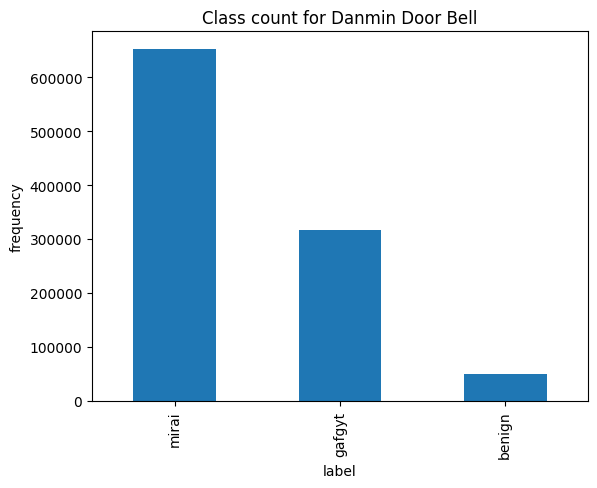

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\3422441194.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(df['label'], sort = True)


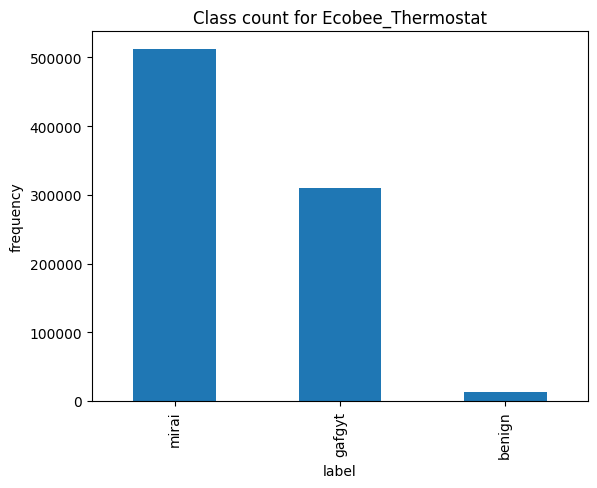

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\3422441194.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(df['label'], sort = True)


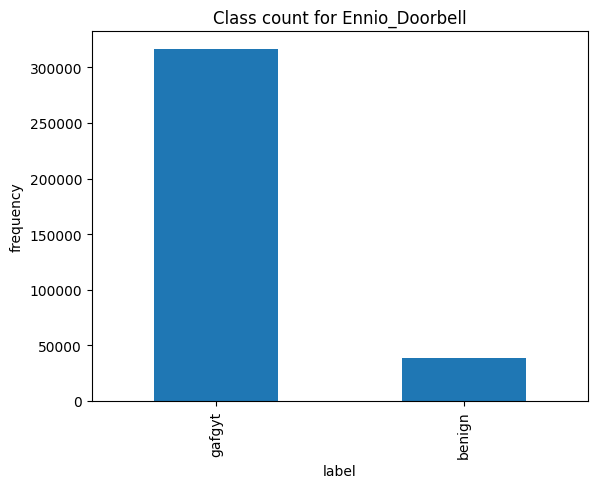

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\3422441194.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(df['label'], sort = True)


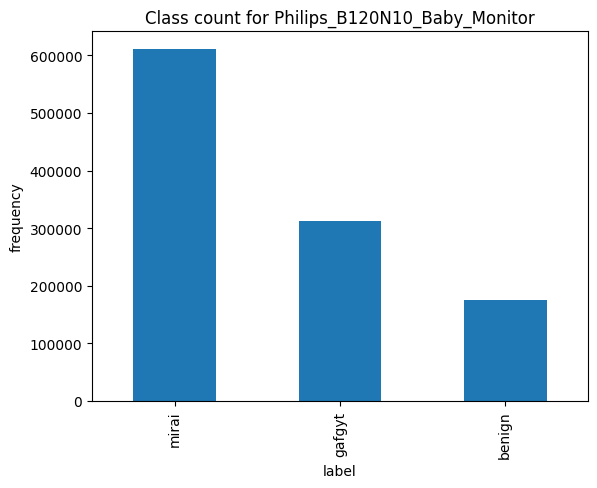

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\3422441194.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(df['label'], sort = True)


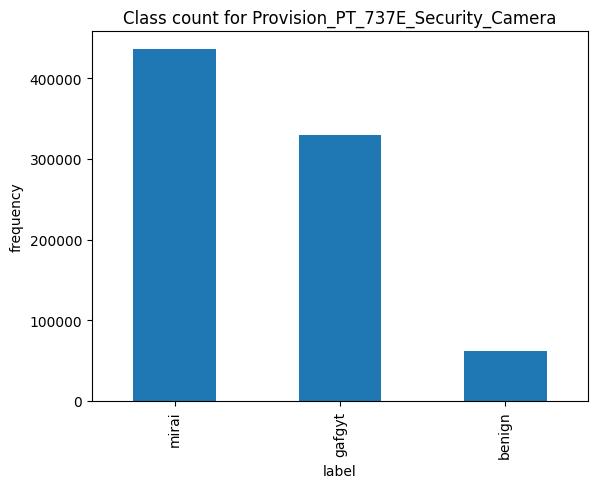

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\3422441194.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(df['label'], sort = True)


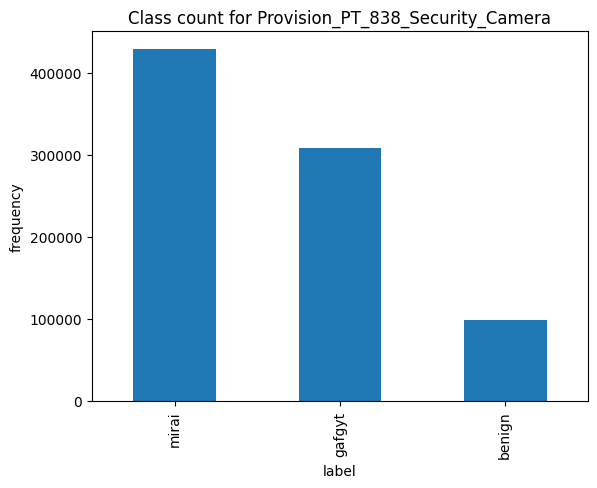

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\3422441194.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(df['label'], sort = True)


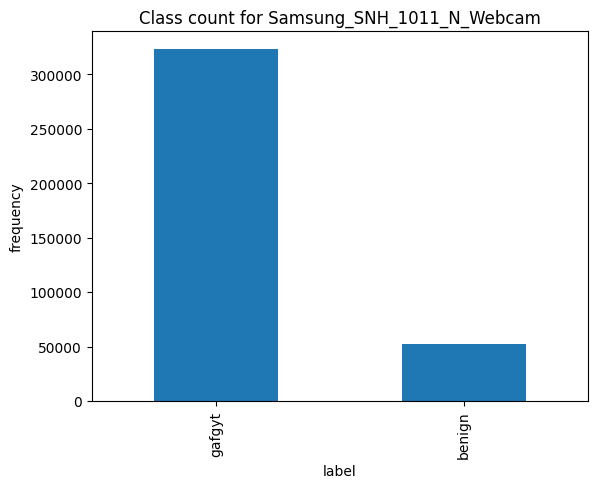

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\3422441194.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(df['label'], sort = True)


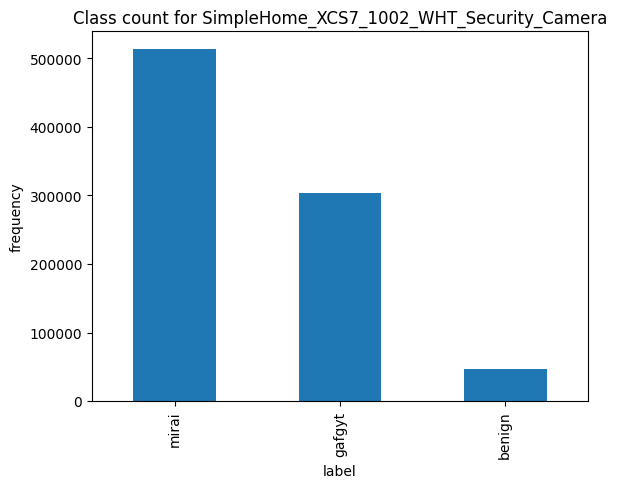

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\3422441194.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(df['label'], sort = True)


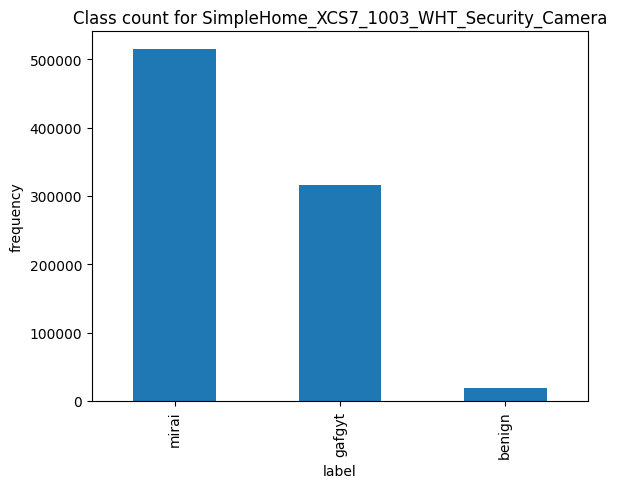

In [81]:
# Run through all different dataframes and viewing the count of each class
for k in dataframe:
    class_value_count(dataframe[k], k)

Mirai attacks is more in this dataset

Data Doesn't have any Null value

#### 2D scatter Plot

In [82]:
# Importing Scikit learn package to do scaling/pricipal componend analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [83]:
# Plotting the data in scatter plot to view how distributed the data 
def plot_2d_scatter_plot(df, title):
    X = df.drop(['label','device'], axis=1).values
    y = df['label'].values
    X_std = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)
    data_X = X_pca[:,0]
    data_Y = X_pca[:,1]
    data_Z = y
    
    colors = ["#ff0000", "#006600", "#ffff00"]
    # Set your custom color palette
    customPalette = sns.set_palette(sns.color_palette(colors))
    
    sns.set(rc={'figure.figsize':(12,9)})
    sns.scatterplot(x=data_X, y=data_Y, hue=data_Z, palette=customPalette).set_title(title)
    

In [84]:
danmini_doorbell_df['label'].value_counts()

label
mirai     652100
gafgyt    316650
benign     49548
Name: count, dtype: int64

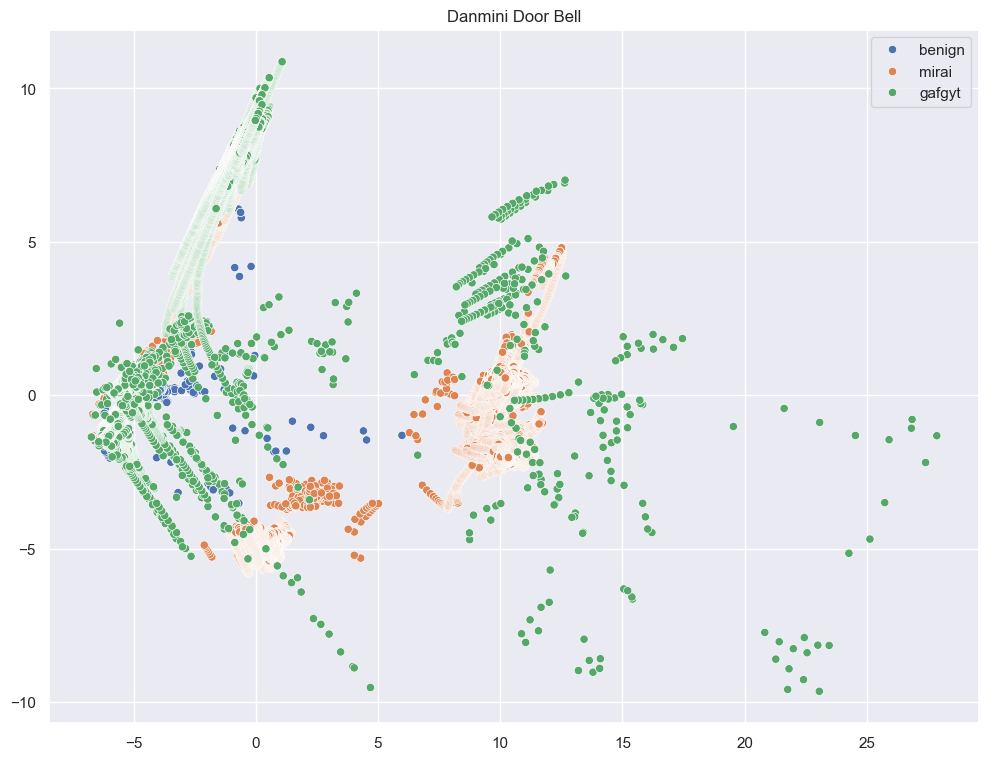

In [85]:
# Plotting the danmini doorbell data
plot_2d_scatter_plot(danmini_doorbell_df, 'Danmini Door Bell')

This shows the mirai attack has its own pattern and the gafgyt attack is more scattered and each type of attack is sepearble 

In [86]:
# 
ecobee_thermostat_df['label'].value_counts()

label
mirai     512133
gafgyt    310630
benign     13113
Name: count, dtype: int64

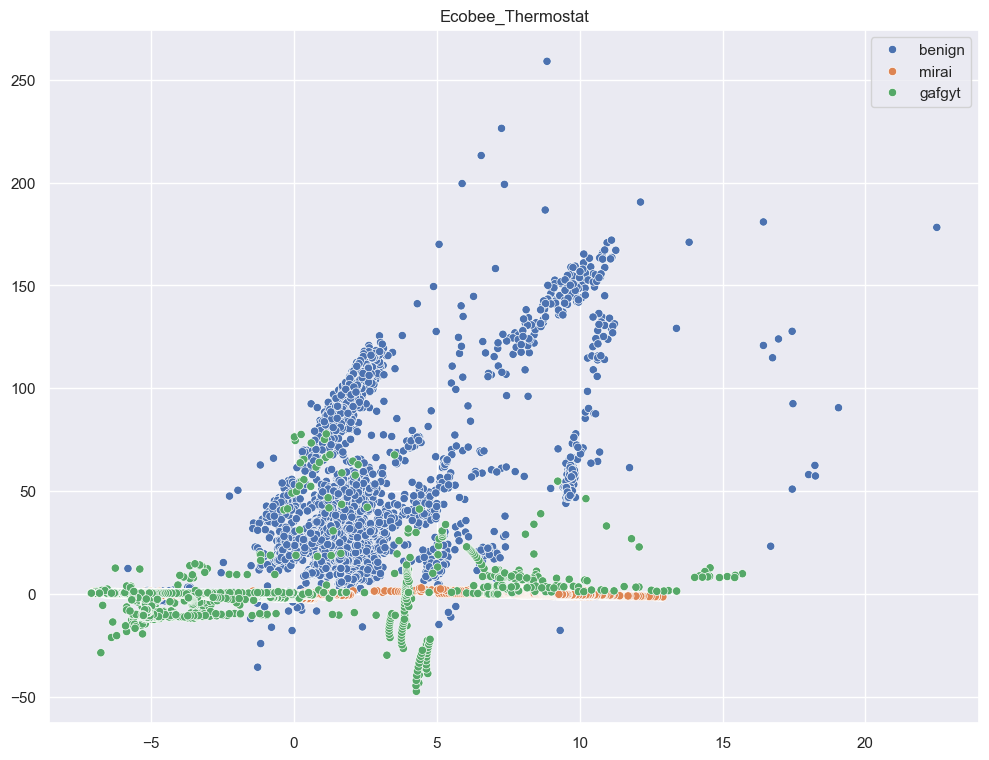

In [87]:
# Plotting the Ecobee thermostat data
plot_2d_scatter_plot(ecobee_thermostat_df, 'Ecobee_Thermostat')

In [88]:
ennio_doorbell_df['label'].value_counts()

label
gafgyt    316400
benign     39100
Name: count, dtype: int64

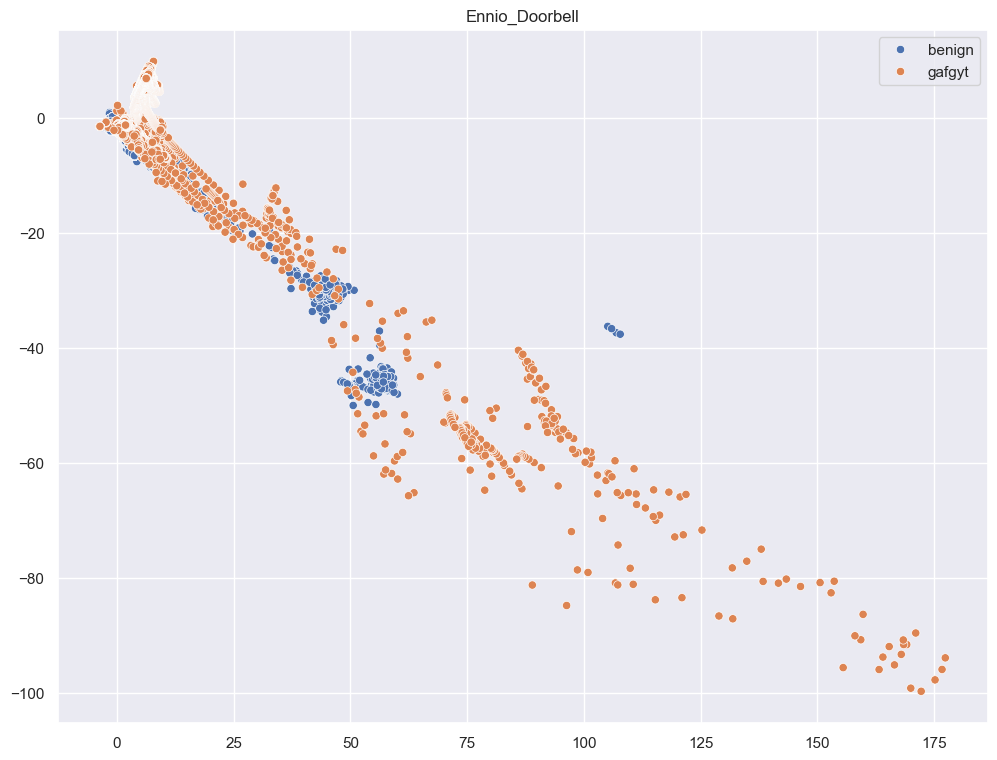

In [89]:
# Plotting ennio doorbell data
plot_2d_scatter_plot(ennio_doorbell_df,  'Ennio_Doorbell')

In [90]:
baby_monitor_df['label'].value_counts()

label
mirai     610714
gafgyt    312723
benign    175240
Name: count, dtype: int64

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


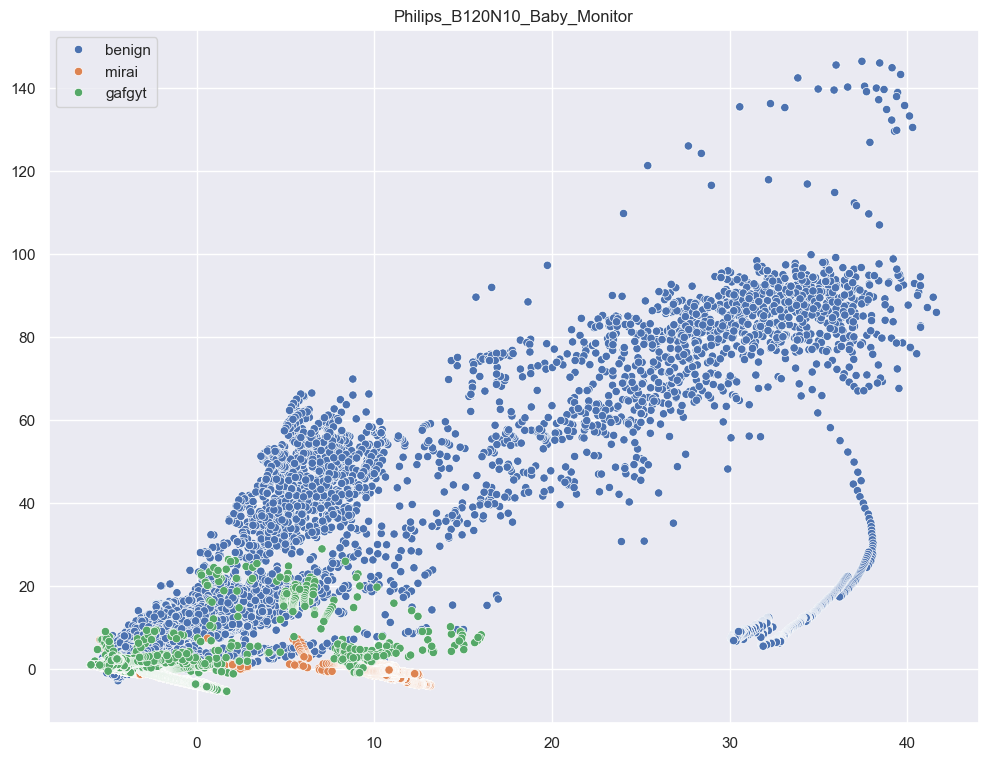

In [91]:
# Plotting Philips baby monitor data
plot_2d_scatter_plot(baby_monitor_df, 'Philips_B120N10_Baby_Monitor')

In [92]:
provision_cam1_df['label'].value_counts()

label
mirai     436010
gafgyt    330096
benign     62154
Name: count, dtype: int64

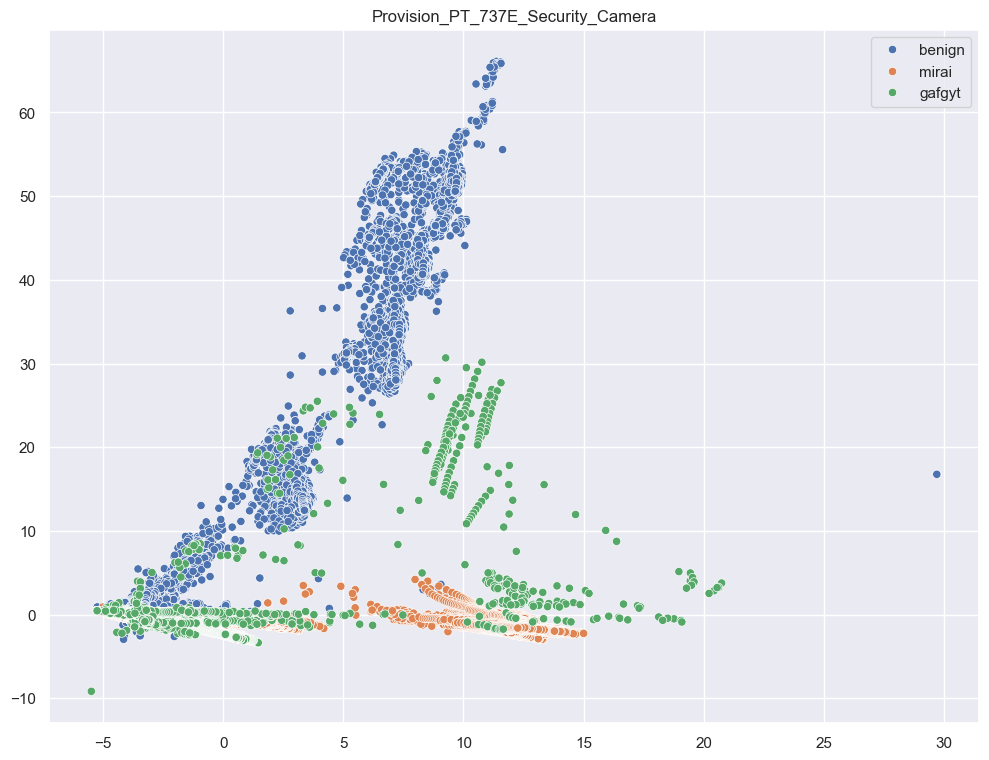

In [93]:
# Plotting provision PT security camera data
plot_2d_scatter_plot(provision_cam1_df, 'Provision_PT_737E_Security_Camera')

In [94]:
provision_cam2_df['label'].value_counts()

label
mirai     429337
gafgyt    309040
benign     98514
Name: count, dtype: int64

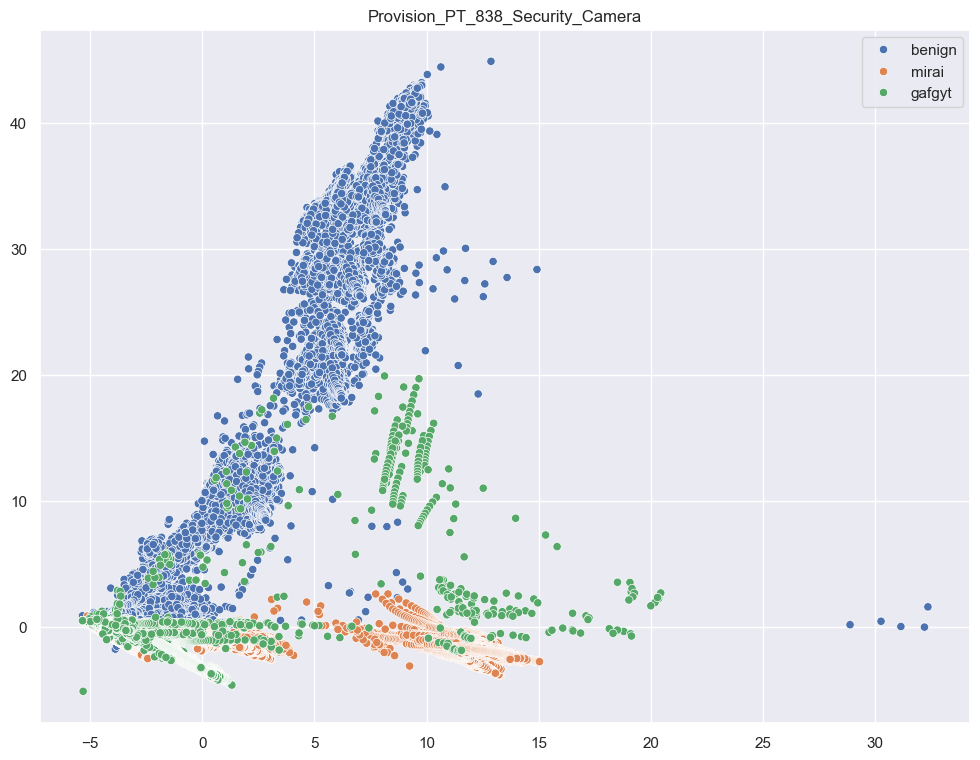

In [95]:
# Plotting provision PT security camera data
plot_2d_scatter_plot(provision_cam2_df, 'Provision_PT_838_Security_Camera')

In [96]:
samsung_cam_df['label'].value_counts()

label
gafgyt    323072
benign     52150
Name: count, dtype: int64

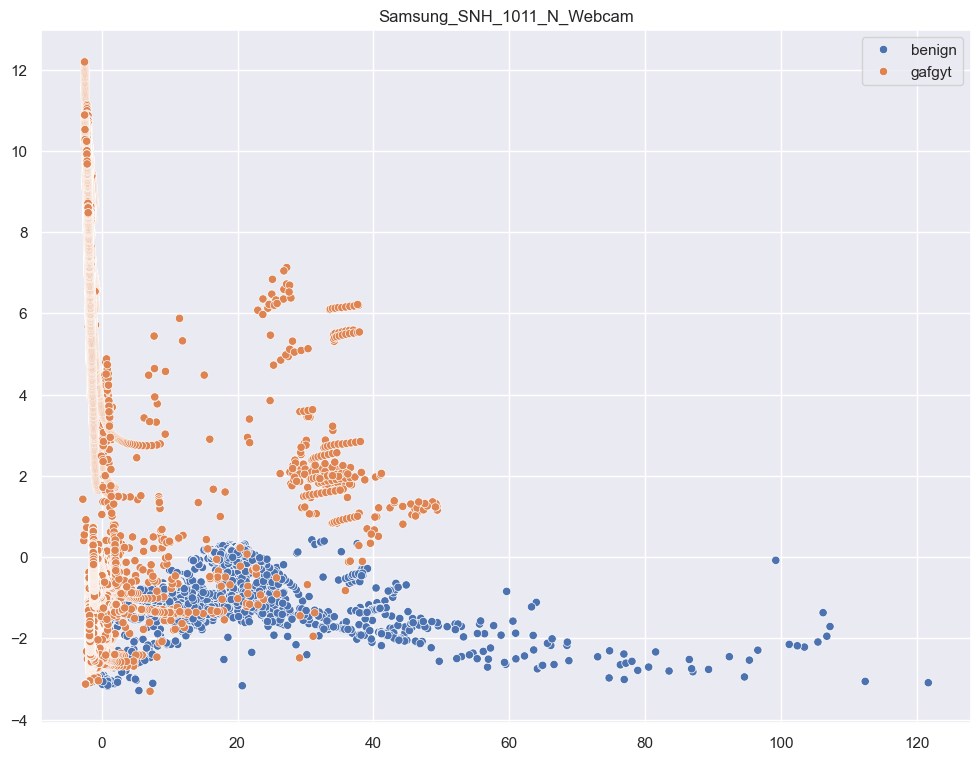

In [97]:
# Plotting samsung security camera data
plot_2d_scatter_plot(samsung_cam_df, 'Samsung_SNH_1011_N_Webcam')

In [98]:
simplehome_cam1_df['label'].value_counts()

label
mirai     513248
gafgyt    303223
benign     46585
Name: count, dtype: int64

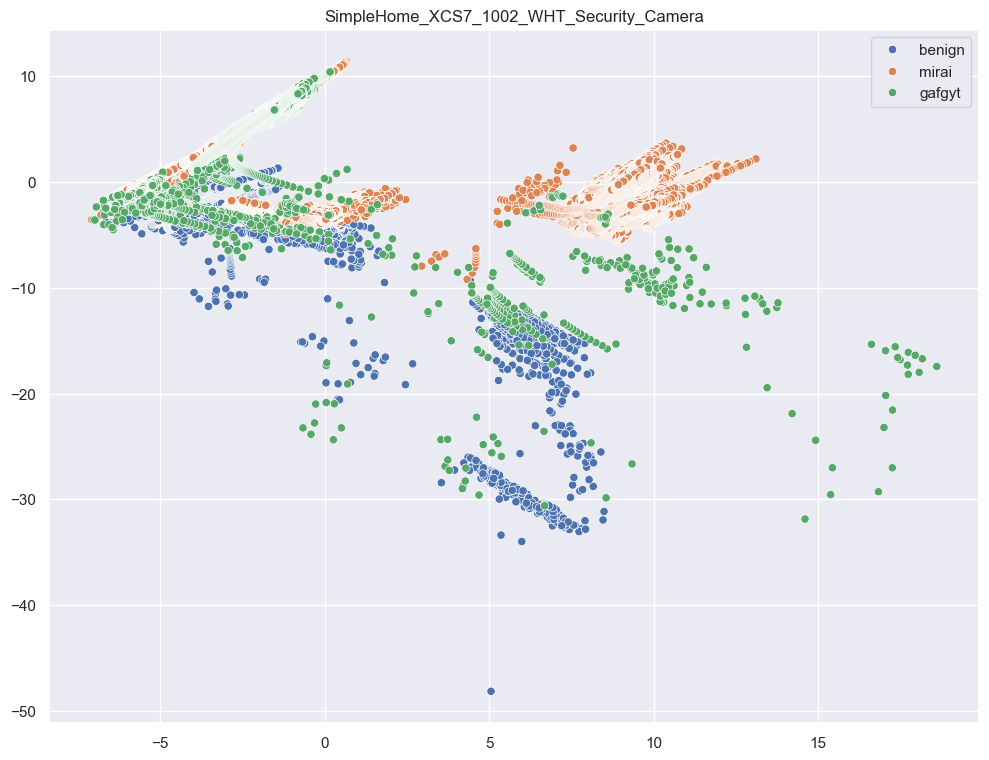

In [99]:
# Plotting simplehome security camera data
plot_2d_scatter_plot(simplehome_cam1_df, 'SimpleHome_XCS7_1002_WHT_Security_Camera')

In [100]:
simplehome_cam2_df['label'].value_counts()

label
mirai     514860
gafgyt    316438
benign     19528
Name: count, dtype: int64

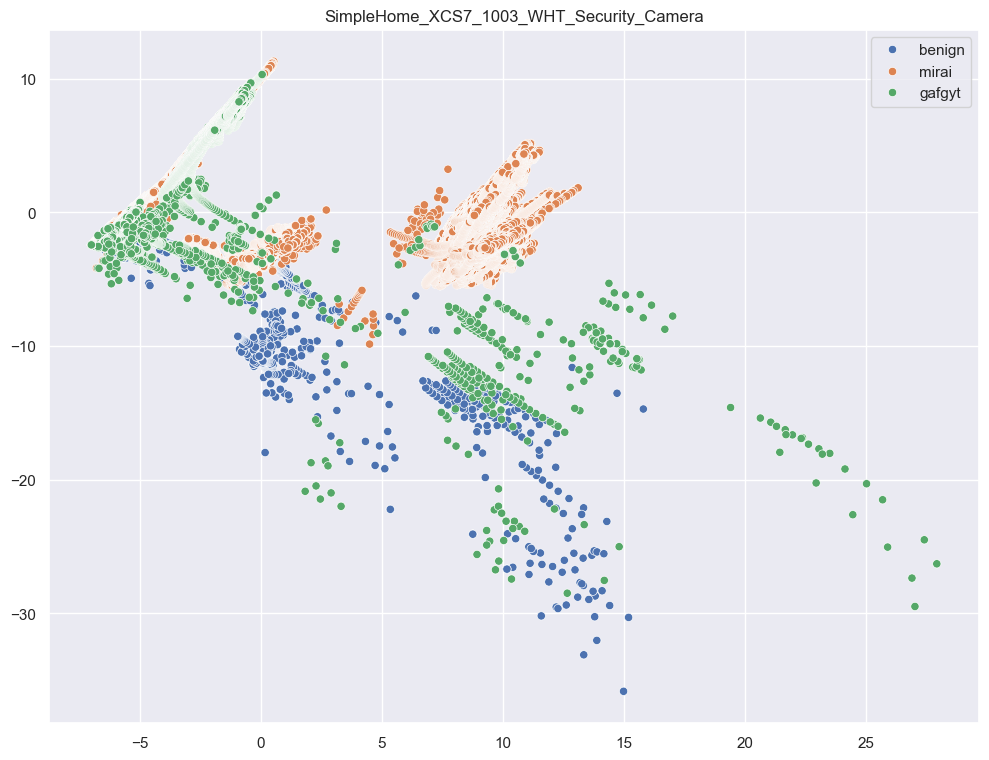

In [101]:
# Plotting simplehome security camera data
plot_2d_scatter_plot(simplehome_cam2_df, 'SimpleHome_XCS7_1003_WHT_Security_Camera')

#### 3D Scatter Plot

In [102]:
# Importing visualization package
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams["figure.figsize"] = (12,9)

In [103]:
# Function to visualize Scatter in 3D
def plot_3d_scatter_plot(df, title):
    X = df.drop(['label','device'], axis=1).values
    df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
    y = df['label'].values
    X_std = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)
    
    
    data_X = X_pca[:,0]
    data_Y = X_pca[:,1]
    data_Z = y

    data = np.column_stack((data_X, data_Y, data_Z))

    benign = mpatches.Patch(color='green', label='Benign')
    mirai = mpatches.Patch(color='red', label='Mirai')
    gafgyt = mpatches.Patch(color='orange', label='Gafgyt')
    handles = [benign, mirai, gafgyt]

    X = data[:,0]
    Y = data[:,1]
    Z = data[:,2]
    
    ax = plt.axes(projection='3d')
    C = ['green' if z == 0 else 'red' if z == 1 else 'orange' for z in Z]
    ax.scatter(X, Y, Z, c = C, cmap='RdYlGn')
    ax.set_title(title);
    plt.legend(handles=handles)
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.

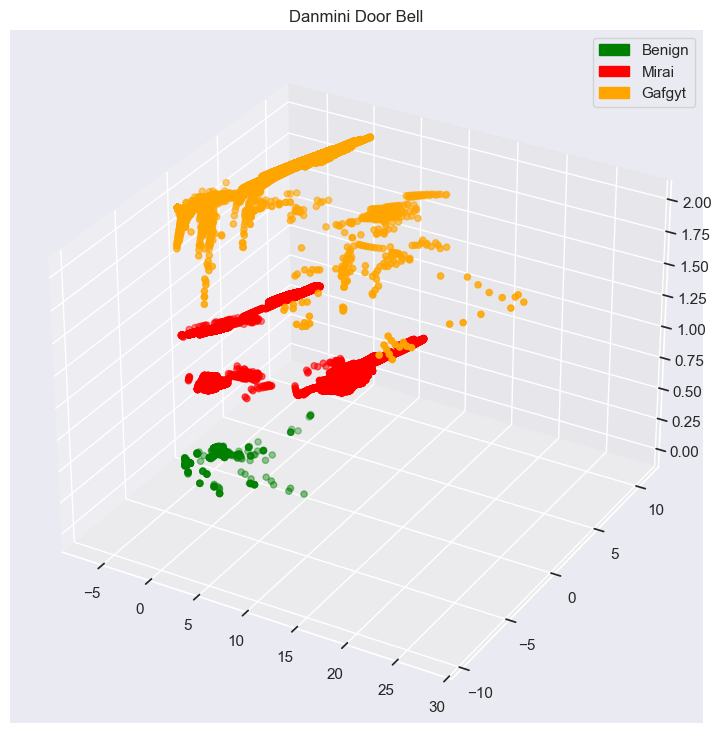

In [104]:
# Visualizing Danmini Door bell 
plot_3d_scatter_plot(danmini_doorbell_df, 'Danmini Door Bell')

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.

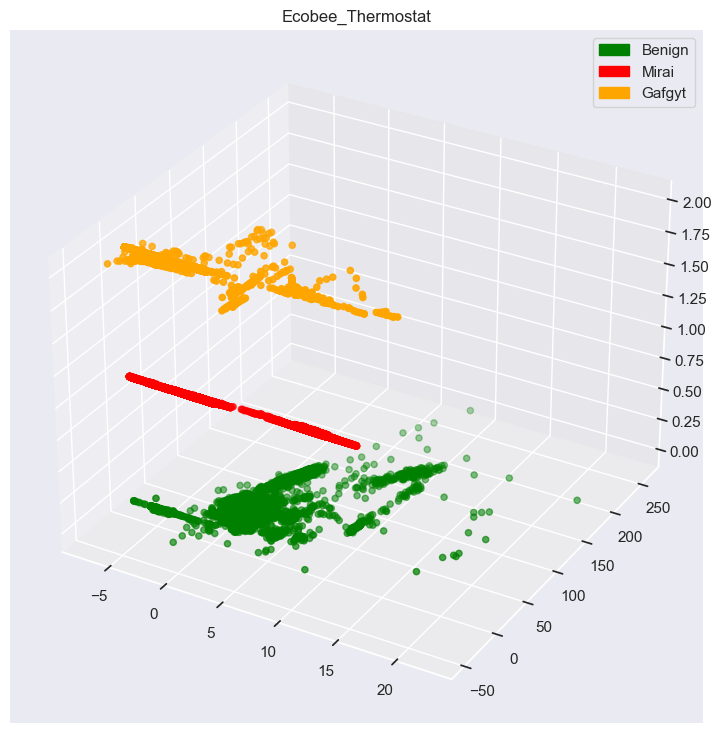

In [105]:
# Visualizing Ecoobee thermostat
plot_3d_scatter_plot(ecobee_thermostat_df, 'Ecobee_Thermostat')

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.

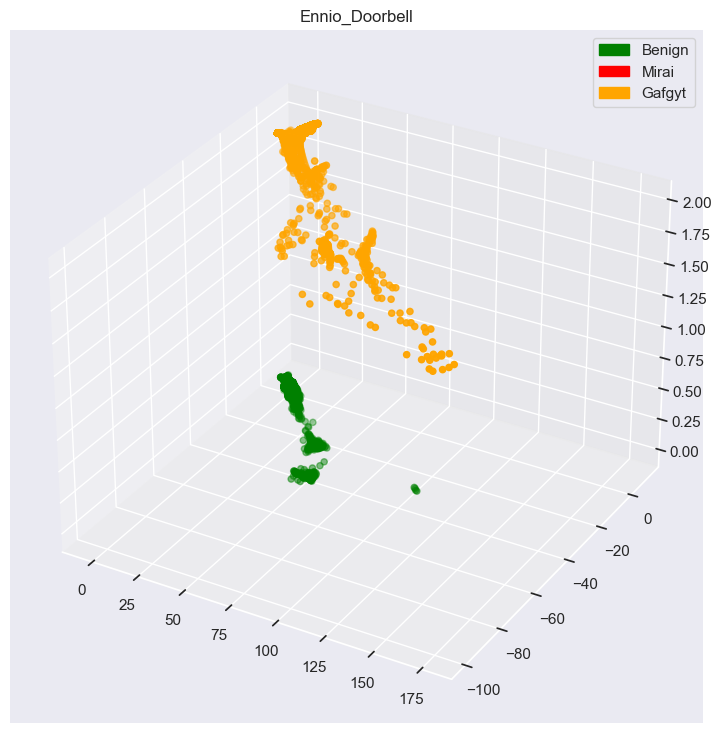

In [106]:
# Visualizing Ennio Door bell 
plot_3d_scatter_plot(ennio_doorbell_df,  'Ennio_Doorbell')

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.

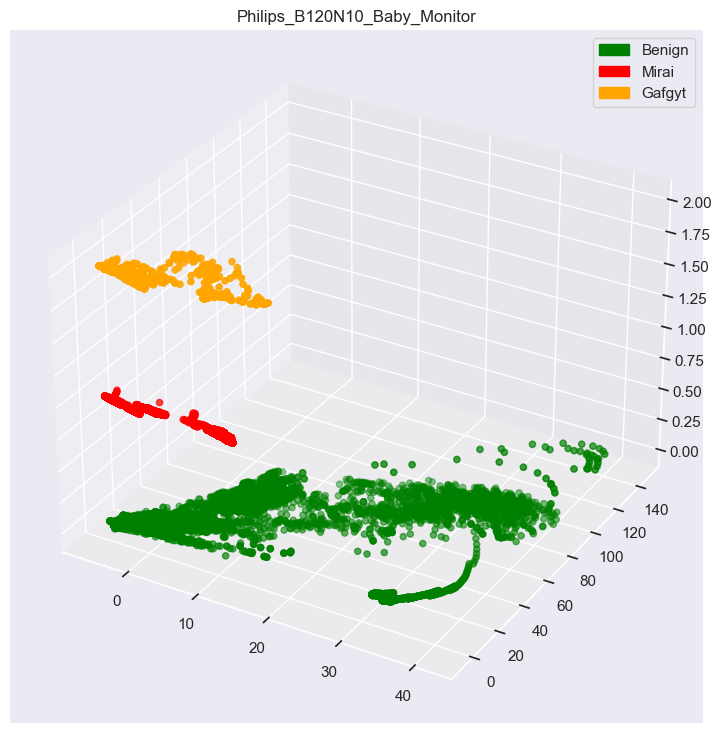

In [107]:
# Visualizing Philips baby monitor
plot_3d_scatter_plot(baby_monitor_df, 'Philips_B120N10_Baby_Monitor')

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.

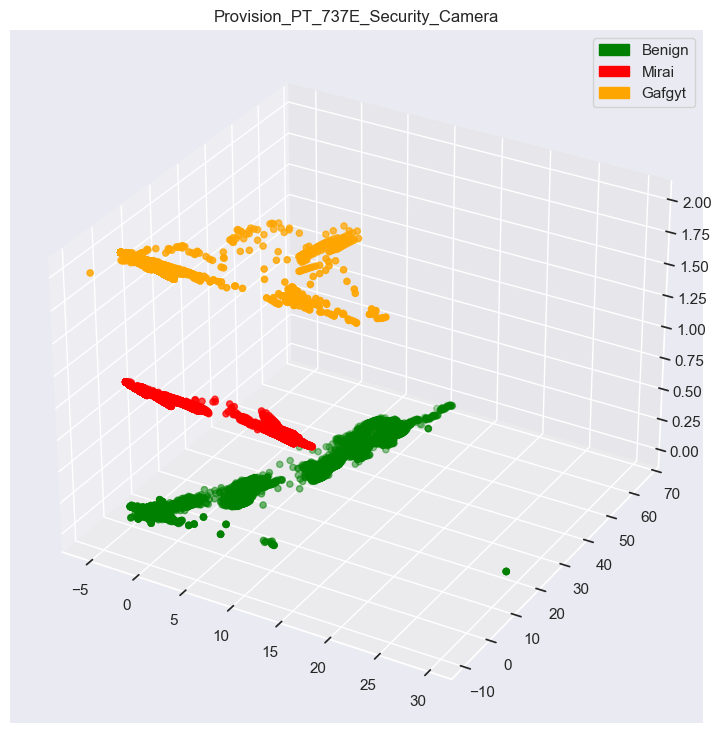

In [108]:
# Visualizing Provision camera
plot_3d_scatter_plot(provision_cam1_df, 'Provision_PT_737E_Security_Camera')

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.

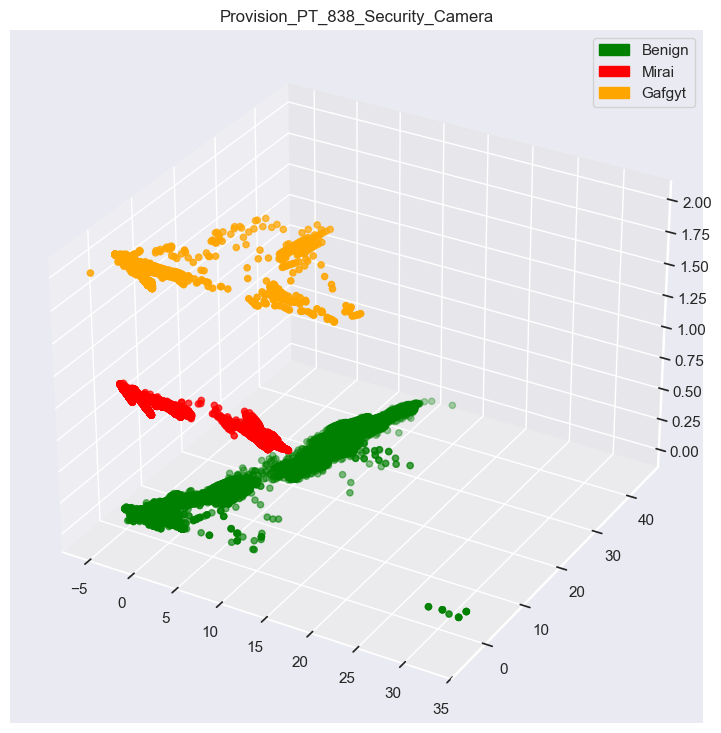

In [109]:
# Visualizing Provision camera
plot_3d_scatter_plot(provision_cam2_df, 'Provision_PT_838_Security_Camera')

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.

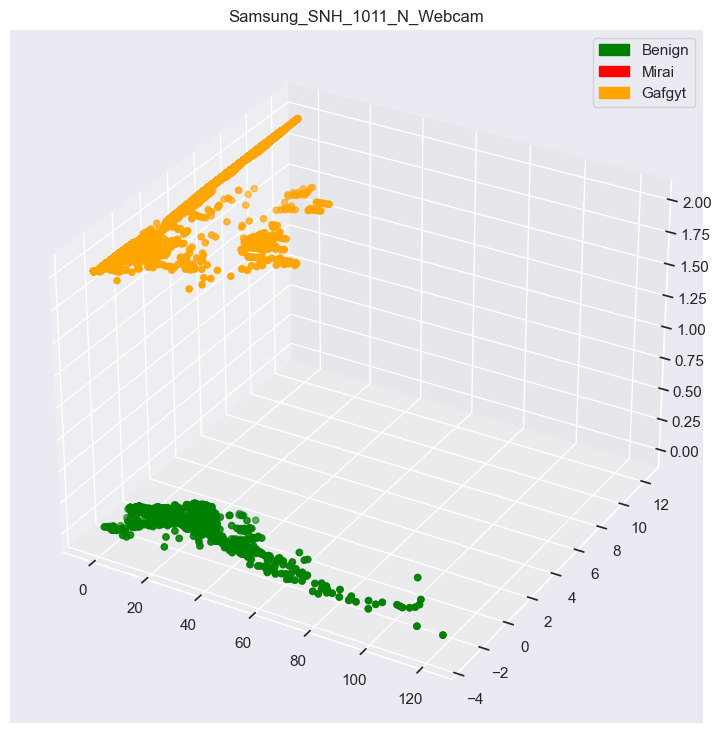

In [110]:
# Visualizing samsung web camera
plot_3d_scatter_plot(samsung_cam_df, 'Samsung_SNH_1011_N_Webcam')

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.

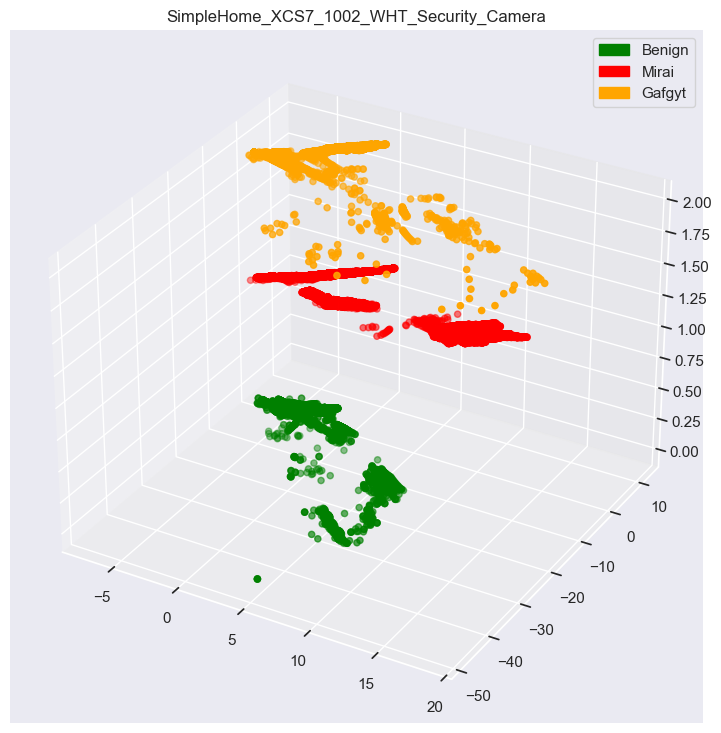

In [111]:
# Visualizing simplehome camera
plot_3d_scatter_plot(simplehome_cam1_df, 'SimpleHome_XCS7_1002_WHT_Security_Camera')

C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].replace({'benign': 0, 'mirai':1, 'gafgyt':2})
C:\Users\HP\AppData\Local\Temp\ipykernel_23792\1411756238.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.

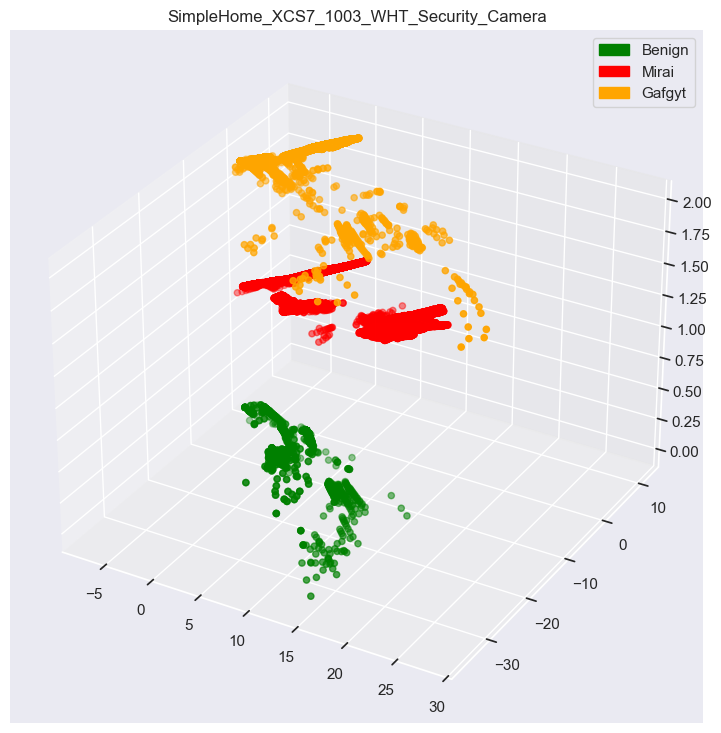

In [112]:
# Visualizing simplehome camera
plot_3d_scatter_plot(simplehome_cam2_df, 'SimpleHome_XCS7_1003_WHT_Security_Camera')

* Data doesn’t have any NaN values.
* There are  115 features is a bit difficult to plot on the surface, we used dimensionality reduction method (PCA) to mathematically reduce the feature into 2 & 3 features and plotted on the scatter plot.
*  Based on 2D / 3D scatter plot the labels are clearly visible. At the same time baby monitors have more benign data than other IoT devices. And data spread across the plot looks like there is more activity happening on the baby monitors than other devices.
* provision PT-737 and PT 838 camera plots are similar to each other. Both mirai and bashlite malwares behave the same way for the same manufacturer device.

In [113]:
print(f"Original full dataset shape: {df.shape}")
print("Original class distribution per device:")
print(df.groupby('device')['label'].value_counts())


# --- Step 2: Define the Sample Size ---
# Let's take 2,000 samples per group. You can change this number.
SAMPLES_PER_GROUP = 2000


# --- Step 3: Create the Stratified Sample ---
# This groups the data by both device and label, then takes a random
# sample of 1,000 from each of those small groups.
df_manageable_sample = df.groupby(['device', 'label']).sample(
    n=SAMPLES_PER_GROUP,
    random_state=42,
    replace=True  # IMPORTANT: Allows sampling with replacement
)

print(f"\nShape of the new manageable sample: {df_manageable_sample.shape}")
print("\nClass distribution in the new sample (should be balanced):")
print(df_manageable_sample.groupby('device')['label'].value_counts())


# --- Step 4: Save the New Sample Dataset ---
# You will use this new, smaller file for all your modeling work.
output_path = 'stratified_sample_for_modeling.csv'
df_manageable_sample.to_csv(output_path, index=False)

print(f"\nSuccessfully created and saved the manageable sample to: {output_path} 👍")

Original full dataset shape: (7062606, 117)
Original class distribution per device:
device                                    label 
Danmini_Doorbell                          mirai     652100
                                          gafgyt    316650
                                          benign     49548
Ecobee_Thermostat                         mirai     512133
                                          gafgyt    310630
                                          benign     13113
Ennio_Doorbell                            gafgyt    316400
                                          benign     39100
Philips_B120N10_Baby_Monitor              mirai     610714
                                          gafgyt    312723
                                          benign    175240
Provision_PT_737E_Security_Camera         mirai     436010
                                          gafgyt    330096
                                          benign     62154
Provision_PT_838_Security_Camera         

In [115]:
df_manageable_sample.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
15795          1.000000       98.000000        0.000000e+00          1.000000   
860            3.959443      101.999972        1.125510e-04          3.977416   
38158          4.969537      102.000000        0.000000e+00          4.981694   
44732          2.991987      102.000000        0.000000e+00          2.995188   
11284          4.909553      102.000000        3.640000e-12          4.945479   

       MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
15795       98.000000            0.000000          1.000000       98.000000   
860        101.998141            0.007434          4.114565      101.880681   
38158      102.000000            0.000000          4.993892      101.999976   
44732      102.000000            0.000000          2.998398      101.999958   
11284      102.000000            0.000000          4.981743      101.999991   

       MI_dir_L1_variance  MI_dir_L0.1_weight  MI_dir_L0.1_mean  \
15795            0.000002            1.766602         96.090481   
860              0.463040            5.541431         99.373735   
38158            0.001027            5.996361         98.930466   
44732            0.001758            3.843674         97.545851   
11284            0.000380            5.865181         99.795318   

       MI_dir_L0.1_variance  MI_dir_L0.01_weight  MI_dir_L0.01_mean  \
15795            115.005980            28.366274          92.447898   
860               78.010520            31.976092          92.871722   
38158            113.885891            33.768672          91.395154   
44732            158.295368            27.560511          92.623291   
11284             82.475290            31.299071          94.149132   

       MI_dir_L0.01_variance  H_L5_weight   H_L5_mean  H_L5_variance  \
15795             261.183875     1.000000   98.000000   0.000000e+00   
860               267.524228     3.959443  101.999972   1.125510e-04   
38158             310.090499     4.969537  102.000000   0.000000e+00   
44732             281.005837     2.991987  102.000000   0.000000e+00   
11284             235.622667     4.909553  102.000000   3.640000e-12   

       H_L3_weight   H_L3_mean  H_L3_variance  H_L1_weight   H_L1_mean  \
15795     1.000000   98.000000       0.000000     1.000000   98.000000   
860       3.977416  101.998141       0.007434     4.114565  101.880681   
38158     4.981694  102.000000       0.000000     4.993892  101.999976   
44732     2.995188  102.000000       0.000000     2.998398  101.999958   
11284     4.945479  102.000000       0.000000     4.981743  101.999991   

       H_L1_variance  H_L0.1_weight  H_L0.1_mean  H_L0.1_variance  \
15795       0.000002       1.766602    96.090481       115.005980   
860         0.463040       5.541431    99.373735        78.010520   
38158       0.001027       5.996361    98.930466       113.885891   
44732       0.001758       3.843674    97.545851       158.295368   
11284       0.000380       5.865181    99.795318        82.475290   

       H_L0.01_weight  H_L0.01_mean  H_L0.01_variance  HH_L5_weight  \
15795       28.366274     92.447898        261.183875           1.0   
860         31.976092     92.871722        267.524228           1.0   
38158       33.768672     91.395154        310.090499           1.0   
44732       27.560511     92.623291        281.005837           1.0   
11284       31.299071     94.149132        235.622667           1.0   

       HH_L5_mean  HH_L5_std  HH_L5_magnitude  HH_L5_radius  HH_L5_covariance  \
15795        98.0        0.0       118.028576    186.178584      3.870000e-88   
860         102.0        0.0       144.249783      0.000000      0.000000e+00   
38158       102.0        0.0       144.249783      0.000000      0.000000e+00   
44732       102.0        0.0       144.249783      0.000000      0.000000e+00   
11284       102.0        0.0       144.249783      0.000000      0.000000e+00   

       H

In [116]:
df_manageable_sample.shape

(50000, 117)

In [117]:
# Creating dict with device name and dataframe for easy access
dataframe = {"Danmini Door Bell": danmini_doorbell_df, 
            "Ecobee_Thermostat": ecobee_thermostat_df,
            "Ennio_Doorbell": ennio_doorbell_df,
            "Philips_B120N10_Baby_Monitor": baby_monitor_df,
            "Provision_PT_737E_Security_Camera": provision_cam1_df,
            "Provision_PT_838_Security_Camera": provision_cam2_df,
            "Samsung_SNH_1011_N_Webcam": samsung_cam_df,
            "SimpleHome_XCS7_1002_WHT_Security_Camera": simplehome_cam1_df,
            "SimpleHome_XCS7_1003_WHT_Security_Camera": simplehome_cam2_df
            }

In [118]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


#### Random Forest Classifier

In [123]:
# Importing necssary modules
import pandas as pd
import numpy as np
import os
import pickle
# Importing Visualization Package
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Scikit learn package
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
        f1_score, classification_report, 
        confusion_matrix, roc_curve, 
        roc_auc_score, accuracy_score,
        log_loss)
from sklearn import __version__ as sklearn_version
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import NearMiss
from datetime import datetime


In [124]:
'''A random forest is a meta estimator that fits a number of decision tree classifiers
   on various sub-samples of the dataset and uses averaging to improve the predictive accuracy 
   and control over-fitting. The sub-sample size is controlled with the max_samples parameter 
   if bootstrap=True (default), otherwise the whole dataset is used to build each tree.
   
   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
'''
def rf_classifier(data, device_name, scaling=False,):
    X = data.drop(['label', 'device'], axis=1)
    y = data['label']
    print(f'Original Shape:{X.shape}, {y.shape}')
    if scaling == False:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
        model_name = f'{device_name}_without_scaling_unbalanced_model.pkl'
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        model_name = f'{device_name}_with_scaling_unbalanced_model.pkl'
    
    clf = RandomForestClassifier()
    model_res = clf.fit(X_train, y_train)
    y_pred = model_res.predict(X_test)
    y_pred_prob = model_res.predict_proba(X_test)
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test, y_pred)
    importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')

    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(importances.head(20))
    
    print('Random Forest: Accuracy=%.3f' % (ac))

    print('Random Forest: f1-score=%.3f' % (f1))
    print('Random Forest: Confusion Matrix', cm)
    print('Random Forest : Classification Report',classification_report(y_test, y_pred))
    
    best_model = clf
    best_model.version = 1.0
    best_model.pandas_version = pd.__version__
    best_model.numpy_version = np.__version__
    best_model.sklearn_version = sklearn_version
    #best_model.X_columns = [col for col in X_train.columns]
    best_model.build_datetime = datetime.now()
    
    modelpath = 'models'
    if not os.path.exists(modelpath):
        os.mkdir(modelpath)
    iotmodel_path = os.path.join(modelpath, model_name)
    if not os.path.exists(iotmodel_path):
        with open(iotmodel_path, 'wb') as f:
            pickle.dump(best_model, f)
    
    print('---------------------- Done ---------------------')

In [125]:
# with out scaling
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    rf_classifier(dataframe[k], k)

----------------------xxxxxxx----------------------
Danmini Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
                       importance
feature                          
H_L0.01_weight              0.065
MI_dir_L0.01_weight         0.064
H_L0.1_weight               0.056
MI_dir_L0.1_weight          0.055
MI_dir_L1_weight            0.050
HH_jit_L1_weight            0.035
H_L0.01_mean                0.030
H_L1_weight                 0.028
H_L5_weight                 0.026
MI_dir_L3_weight            0.025
MI_dir_L0.01_mean           0.024
H_L3_weight                 0.022
MI_dir_L0.1_mean            0.021
HH_L1_weight                0.021
HH_L0.1_weight              0.020
HH_jit_L5_mean              0.020
HH_jit_L3_weight            0.019
H_L1_mean                   0.019
MI_dir_L0.01_variance       0.019
MI_dir_L1_mean              0.018
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Forest: Confusion Mat

In [ ]:
# with scaling and balanced data
for k in dataframe:
    print("----------------------xxxxxxx----------------------")
    print(k)
    print("----------------------xxxxxxx----------------------")
    rf_classifier_balanced(dataframe[k], k, True)

----------------------xxxxxxx----------------------
Danmin Door Bell
----------------------xxxxxxx----------------------
Original Shape:(1018298, 115), (1018298,)
Imblearn Shape:(148644, 115), (148644,)
                    importance
feature                       
HH_jit_L5_mean           0.097
HH_jit_L0.01_mean        0.082
HH_jit_L3_mean           0.075
HH_jit_L0.1_mean         0.075
HH_jit_L1_mean           0.060
MI_dir_L0.01_mean        0.058
HH_L5_magnitude          0.055
MI_dir_L0.1_weight       0.048
H_L0.1_weight            0.047
HH_L0.1_magnitude        0.040
HpHp_L5_magnitude        0.031
HH_L3_magnitude          0.026
HH_L1_magnitude          0.023
MI_dir_L3_weight         0.022
H_L0.01_mean             0.020
HpHp_L3_magnitude        0.020
HpHp_L1_magnitude        0.015
HH_L0.01_magnitude       0.015
MI_dir_L5_weight         0.015
HH_L0.01_mean            0.014
Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000
Random Forest: Confusion Matrix [[14849     0     0]
 [